# 1.1: Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [2]:
import requests
import io


import datetime

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
import statsmodels.formula.api as smf7

# 1.2: Import and Understand Each Dataset

In [3]:
cab_df = pd.read_csv('https://raw.githubusercontent.com/atakanozdin/DataSets/main/Cab_Data.csv')


In [4]:
cab_df = cab_df.dropna()
cab_df.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [5]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 21.9+ MB


In [6]:
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [7]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [8]:
for col in cab_df.columns:
    if ' ' in col:
        cab_df = cab_df.rename(columns={col:col.replace(' ','_')})

In [9]:
%%time
from datetime import datetime
import xlrd

cab_df["Date_of_Travel"] = cab_df["Date_of_Travel"].apply(lambda x: xlrd.xldate.xldate_as_datetime(x, 0))

Wall time: 898 ms


In [10]:
cab_df.head()

Transaction_ID Date_of_Travel   Company        City  KM_Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price_Charged  Cost_of_Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [11]:
cab_df.describe()

Transaction_ID   KM_Travelled  Price_Charged   Cost_of_Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000

In [12]:
cab_df.shape

(359392, 7)

In [13]:
cab_df.City.value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [14]:
cab_df.Company.value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

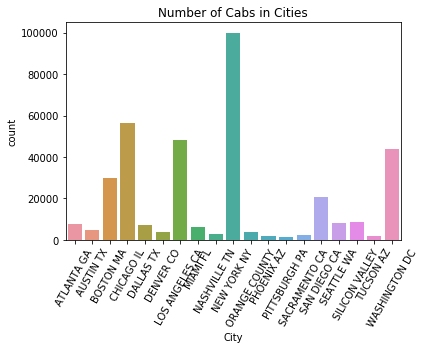

In [15]:
ax = sns.countplot(x="City", data = cab_df);
plt.xticks(rotation=60);
plt.rcParams["figure.figsize"] = (5,5)
ax.set_title("Number of Cabs in Cities");

# Categorical Values of Cab_Data's Company

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


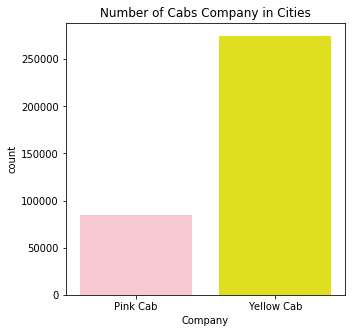

In [16]:
print(cab_df["Company"].value_counts())
color = ["pink","yellow"]
sns.set_palette(sns.color_palette(color))
ax= sns.countplot(x="Company", data = cab_df);

plt.rcParams["figure.figsize"] = (12,6)
ax.set_title("Number of Cabs Company in Cities");

In [17]:
transaction_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
transaction_id.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [18]:
transaction_id.shape

(440098, 3)

In [19]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [20]:
transaction_id.describe()

Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

In [21]:
for col in transaction_id.columns:
    if ' ' in col:
        transaction_id = transaction_id.rename(columns={col:col.replace(' ','_')})

# customer_id data analysis

In [22]:
#Customer data
customer_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
customer_id.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [23]:
customer_id.shape

(49171, 4)

In [24]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [25]:
for col in customer_id.columns:
    if ' ' in col:
        customer_id = customer_id.rename(columns={col:col.replace(' ','_')})

In [26]:
customer_id = customer_id.rename(columns={'Income_(USD/Month)':'Income'})

In [27]:
customer_id.describe()

Customer_ID           Age        Income
count  49171.000000  49171.000000  49171.000000
mean   28398.252283     35.363121  15015.631856
std    17714.137333     12.599066   8002.208253
min        1.000000     18.000000   2000.000000
25%    12654.500000     25.000000   8289.500000
50%    27631.000000     33.000000  14656.000000
75%    43284.500000     42.000000  21035.000000
max    60000.000000     65.000000  35000.000000

# city data analysis

In [28]:
city_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
city_data.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [29]:
city_data.shape

(20, 3)

In [30]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [31]:
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)

In [32]:
city_data['Percentage_Users'] = (city_data['Users'] / city_data['Population']) * 100


In [33]:
city_data

City  Population   Users  Percentage_Users
0        NEW YORK NY     8405837  302149          3.594514
1         CHICAGO IL     1955130  164468          8.412126
2     LOS ANGELES CA     1595037  144132          9.036279
3           MIAMI FL     1339155   17675          1.319862
4     SILICON VALLEY     1177609   27247          2.313756
5      ORANGE COUNTY     1030185   12994          1.261327
6       SAN DIEGO CA      959307   69995          7.296413
7         PHOENIX AZ      943999    6133          0.649683
8          DALLAS TX      942908   22157          2.349858
9         ATLANTA GA      814885   24701          3.031225
10         DENVER CO      754233   12421          1.646839
11         AUSTIN TX      698371   14978          2.144705
12        SEATTLE WA      671238   25063          3.733847
13         TUCSON AZ      631442    5712          0.904596
14  SAN FRANCISCO CA      629591  213609         33.928217
15     SACRAMENTO CA      545776    7044          1.290639
16     PITTSBURGH PA      542085    3643          0.672035
17     WASHINGTON DC      418859  127001         30.320705
18      NASHVILLE TN      327225    9270          2.832913
19         BOSTON MA      248968   80021         32.141078

In [34]:
cab = cab_df.set_index(['Transaction_ID'])
transaction = transaction_id.set_index(['Transaction_ID'])
dataset = cab.join(transaction)
dataset

Date_of_Travel     Company           City  KM_Travelled  \
Transaction_ID                                                           
10000011           2016-01-08    Pink Cab     ATLANTA GA         30.45   
10000012           2016-01-06    Pink Cab     ATLANTA GA         28.62   
10000013           2016-01-02    Pink Cab     ATLANTA GA          9.04   
10000014           2016-01-07    Pink Cab     ATLANTA GA         33.17   
10000015           2016-01-03    Pink Cab     ATLANTA GA          8.73   
...                       ...         ...            ...           ...   
10440101           2018-01-08  Yellow Cab  WASHINGTON DC          4.80   
10440104           2018-01-04  Yellow Cab  WASHINGTON DC          8.40   
10440105           2018-01-05  Yellow Cab  WASHINGTON DC         27.75   
10440106           2018-01-05  Yellow Cab  WASHINGTON DC          8.80   
10440107           2018-01-02  Yellow Cab  WASHINGTON DC         12.76   

                Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode  
Transaction_ID                                                         
10000011               370.95      313.6350        29290         Card  
10000012               358.52      334.8540        27703         Card  
10000013               125.20       97.6320        28712         Cash  
10000014               377.40      351.6020        28020         Cash  
10000015               114.62       97.7760        27182         Card  
...                       ...           ...          ...          ...  
10440101                69.24       63.3600        52392         Cash  
10440104               113.75      106.8480        53286         Cash  
10440105               437.07      349.6500        52265         Cash  
10440106               146.19      114.0480        52175         Card  
10440107               191.58      177.6192        52917         Card  

[359392 rows x 8 columns]

In [35]:
dataset.reset_index(level =['Transaction_ID'], inplace = True)
dataset

Transaction_ID Date_of_Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012     2016-01-06    Pink Cab     ATLANTA GA   
2             10000013     2016-01-02    Pink Cab     ATLANTA GA   
3             10000014     2016-01-07    Pink Cab     ATLANTA GA   
4             10000015     2016-01-03    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode  
0              30.45         370.95      313.6350        29290         Card  
1              28.62         358.52      334.8540        27703         Card  
2               9.04         125.20       97.6320        28712         Cash  
3              33.17         377.40      351.6020        28020         Cash  
4               8.73         114.62       97.7760        27182         Card  
...              ...            ...           ...          ...          ...  
359387          4.80          69.24       63.3600        52392         Cash  
359388          8.40         113.75      106.8480        53286         Cash  
359389         27.75         437.07      349.6500        52265         Cash  
359390          8.80         146.19      114.0480        52175         Card  
359391         12.76         191.58      177.6192        52917         Card  

[359392 rows x 9 columns]

In [36]:
combined = dataset.set_index([dataset.index,'Customer_ID'])
customer = customer_id.set_index(['Customer_ID'])
dataset = combined.join(customer)
dataset

Transaction_ID Date_of_Travel     Company           City  \
       Customer_ID                                                             
0      29290              10000011     2016-01-08    Pink Cab     ATLANTA GA   
1      27703              10000012     2016-01-06    Pink Cab     ATLANTA GA   
2      28712              10000013     2016-01-02    Pink Cab     ATLANTA GA   
3      28020              10000014     2016-01-07    Pink Cab     ATLANTA GA   
4      27182              10000015     2016-01-03    Pink Cab     ATLANTA GA   
...                            ...            ...         ...            ...   
359387 52392              10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388 53286              10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389 52265              10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390 52175              10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391 52917              10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

                    KM_Travelled  Price_Charged  Cost_of_Trip Payment_Mode  \
       Customer_ID                                                           
0      29290               30.45         370.95      313.6350         Card   
1      27703               28.62         358.52      334.8540         Card   
2      28712                9.04         125.20       97.6320         Cash   
3      28020               33.17         377.40      351.6020         Cash   
4      27182                8.73         114.62       97.7760         Card   
...                          ...            ...           ...          ...   
359387 52392                4.80          69.24       63.3600         Cash   
359388 53286                8.40         113.75      106.8480         Cash   
359389 52265               27.75         437.07      349.6500         Cash   
359390 52175                8.80         146.19      114.0480         Card   
359391 52917               12.76         191.58      177.6192         Card   

                   Gender  Age  Income  
       Customer_ID                      
0      29290         Male   28   10813  
1      27703         Male   27    9237  
2      28712         Male   53   11242  
3      28020         Male   23   23327  
4      27182         Male   33    8536  
...                   ...  ...     ...  
359387 52392         Male   24   15651  
359388 53286         Male   32    6528  
359389 52265         Male   56    7966  
359390 52175         Male   32    6423  
359391 52917         Male   20   11284  

[359392 rows x 11 columns]

In [37]:
dataset.reset_index(level =['Customer_ID'], inplace = True)
dataset

Customer_ID  Transaction_ID Date_of_Travel     Company           City  \
0             29290        10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             27703        10000012     2016-01-06    Pink Cab     ATLANTA GA   
2             28712        10000013     2016-01-02    Pink Cab     ATLANTA GA   
3             28020        10000014     2016-01-07    Pink Cab     ATLANTA GA   
4             27182        10000015     2016-01-03    Pink Cab     ATLANTA GA   
...             ...             ...            ...         ...            ...   
359387        52392        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        53286        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        52265        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        52175        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        52917        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip Payment_Mode Gender  Age  \
0              30.45         370.95      313.6350         Card   Male   28   
1              28.62         358.52      334.8540         Card   Male   27   
2               9.04         125.20       97.6320         Cash   Male   53   
3              33.17         377.40      351.6020         Cash   Male   23   
4               8.73         114.62       97.7760         Card   Male   33   
...              ...            ...           ...          ...    ...  ...   
359387          4.80          69.24       63.3600         Cash   Male   24   
359388          8.40         113.75      106.8480         Cash   Male   32   
359389         27.75         437.07      349.6500         Cash   Male   56   
359390          8.80         146.19      114.0480         Card   Male   32   
359391         12.76         191.58      177.6192         Card   Male   20   

        Income  
0        10813  
1         9237  
2        11242  
3        23327  
4         8536  
...        ...  
359387   15651  
359388    6528  
359389    7966  
359390    6423  
359391   11284  

[359392 rows x 12 columns]

In [38]:
dataset = pd.merge(dataset, city_data, on = 'City', how = 'inner')

In [39]:
dataset

Customer_ID  Transaction_ID Date_of_Travel     Company           City  \
0             29290        10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             27703        10000012     2016-01-06    Pink Cab     ATLANTA GA   
2             28712        10000013     2016-01-02    Pink Cab     ATLANTA GA   
3             28020        10000014     2016-01-07    Pink Cab     ATLANTA GA   
4             27182        10000015     2016-01-03    Pink Cab     ATLANTA GA   
...             ...             ...            ...         ...            ...   
359387        52392        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        53286        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        52265        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        52175        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        52917        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip Payment_Mode Gender  Age  \
0              30.45         370.95      313.6350         Card   Male   28   
1              28.62         358.52      334.8540         Card   Male   27   
2               9.04         125.20       97.6320         Cash   Male   53   
3              33.17         377.40      351.6020         Cash   Male   23   
4               8.73         114.62       97.7760         Card   Male   33   
...              ...            ...           ...          ...    ...  ...   
359387          4.80          69.24       63.3600         Cash   Male   24   
359388          8.40         113.75      106.8480         Cash   Male   32   
359389         27.75         437.07      349.6500         Cash   Male   56   
359390          8.80         146.19      114.0480         Card   Male   32   
359391         12.76         191.58      177.6192         Card   Male   20   

        Income  Population   Users  Percentage_Users  
0        10813      814885   24701          3.031225  
1         9237      814885   24701          3.031225  
2        11242      814885   24701          3.031225  
3        23327      814885   24701          3.031225  
4         8536      814885   24701          3.031225  
...        ...         ...     ...               ...  
359387   15651      418859  127001         30.320705  
359388    6528      418859  127001         30.320705  
359389    7966      418859  127001         30.320705  
359390    6423      418859  127001         30.320705  
359391   11284      418859  127001         30.320705  

[359392 rows x 15 columns]

In [40]:
dataset['Profit'] = dataset['Price_Charged'] - dataset['Cost_of_Trip']
dataset = dataset[['Transaction_ID', 'Customer_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Profit', 'Payment_Mode', 'Gender', 'Age', 'Income','Population','Users','Percentage_Users']]
dataset

Transaction_ID  Customer_ID Date_of_Travel     Company           City  \
0             10000011        29290     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012        27703     2016-01-06    Pink Cab     ATLANTA GA   
2             10000013        28712     2016-01-02    Pink Cab     ATLANTA GA   
3             10000014        28020     2016-01-07    Pink Cab     ATLANTA GA   
4             10000015        27182     2016-01-03    Pink Cab     ATLANTA GA   
...                ...          ...            ...         ...            ...   
359387        10440101        52392     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        10440104        53286     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        10440105        52265     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        10440106        52175     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        10440107        52917     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip   Profit Payment_Mode  \
0              30.45         370.95      313.6350  57.3150         Card   
1              28.62         358.52      334.8540  23.6660         Card   
2               9.04         125.20       97.6320  27.5680         Cash   
3              33.17         377.40      351.6020  25.7980         Cash   
4               8.73         114.62       97.7760  16.8440         Card   
...              ...            ...           ...      ...          ...   
359387          4.80          69.24       63.3600   5.8800         Cash   
359388          8.40         113.75      106.8480   6.9020         Cash   
359389         27.75         437.07      349.6500  87.4200         Cash   
359390          8.80         146.19      114.0480  32.1420         Card   
359391         12.76         191.58      177.6192  13.9608         Card   

       Gender  Age  Income  Population   Users  Percentage_Users  
0        Male   28   10813      814885   24701          3.031225  
1        Male   27    9237      814885   24701          3.031225  
2        Male   53   11242      814885   24701          3.031225  
3        Male   23   23327      814885   24701          3.031225  
4        Male   33    8536      814885   24701          3.031225  
...       ...  ...     ...         ...     ...               ...  
359387   Male   24   15651      418859  127001         30.320705  
359388   Male   32    6528      418859  127001         30.320705  
359389   Male   56    7966      418859  127001         30.320705  
359390   Male   32    6423      418859  127001         30.320705  
359391   Male   20   11284      418859  127001         30.320705  

[359392 rows x 16 columns]

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    359392 non-null  int64         
 1   Customer_ID       359392 non-null  int64         
 2   Date_of_Travel    359392 non-null  datetime64[ns]
 3   Company           359392 non-null  object        
 4   City              359392 non-null  object        
 5   KM_Travelled      359392 non-null  float64       
 6   Price_Charged     359392 non-null  float64       
 7   Cost_of_Trip      359392 non-null  float64       
 8   Profit            359392 non-null  float64       
 9   Payment_Mode      359392 non-null  object        
 10  Gender            359392 non-null  object        
 11  Age               359392 non-null  int64         
 12  Income            359392 non-null  int64         
 13  Population        359392 non-null  int32         
 14  User

In [42]:
dataset.describe()

Transaction_ID    Customer_ID   KM_Travelled  Price_Charged  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07   19191.652115      22.567254     423.443311   
std      1.268058e+05   21012.412463      12.233526     274.378911   
min      1.000001e+07       1.000000       1.900000      15.600000   
25%      1.011081e+07    2705.000000      12.000000     206.437500   
50%      1.022104e+07    7459.000000      22.440000     386.360000   
75%      1.033094e+07   36078.000000      32.960000     583.660000   
max      1.044011e+07   60000.000000      48.000000    2048.030000   

        Cost_of_Trip         Profit            Age         Income  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      286.190113     137.253198      35.336705   15048.822937   
std       157.993661     160.311840      12.594234    7969.409482   
min        19.000000    -220.060000      18.000000    2000.000000   
25%       151.200000      28.012000      25.000000    8424.000000   
50%       282.480000      81.962000      33.000000   14685.000000   
75%       413.683200     190.030000      42.000000   21035.000000   
max       691.200000    1463.966000      65.000000   35000.000000   

         Population          Users  Percentage_Users  
count  3.593920e+05  359392.000000     359392.000000  
mean   3.132198e+06  158365.582267         10.668662  
std    3.315194e+06  100850.051020         10.633114  
min    2.489680e+05    3643.000000          0.649683  
25%    6.712380e+05   80021.000000          3.594514  
50%    1.595037e+06  144132.000000          7.296413  
75%    8.405837e+06  302149.000000          9.036279  
max    8.405837e+06  302149.000000         32.141078

In [43]:
dataset.describe(include='all')

C:\Users\anmul\anaconda3.6\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


Transaction_ID    Customer_ID       Date_of_Travel     Company  \
count     3.593920e+05  359392.000000               359392      359392   
unique             NaN            NaN                 1095           2   
top                NaN            NaN  2018-01-05 00:00:00  Yellow Cab   
freq               NaN            NaN                 2022      274681   
first              NaN            NaN  2016-01-02 00:00:00         NaN   
last               NaN            NaN  2018-12-31 00:00:00         NaN   
mean      1.022076e+07   19191.652115                  NaN         NaN   
std       1.268058e+05   21012.412463                  NaN         NaN   
min       1.000001e+07       1.000000                  NaN         NaN   
25%       1.011081e+07    2705.000000                  NaN         NaN   
50%       1.022104e+07    7459.000000                  NaN         NaN   
75%       1.033094e+07   36078.000000                  NaN         NaN   
max       1.044011e+07   60000.000000                  NaN         NaN   

               City   KM_Travelled  Price_Charged   Cost_of_Trip  \
count        359392  359392.000000  359392.000000  359392.000000   
unique           19            NaN            NaN            NaN   
top     NEW YORK NY            NaN            NaN            NaN   
freq          99885            NaN            NaN            NaN   
first           NaN            NaN            NaN            NaN   
last            NaN            NaN            NaN            NaN   
mean            NaN      22.567254     423.443311     286.190113   
std             NaN      12.233526     274.378911     157.993661   
min             NaN       1.900000      15.600000      19.000000   
25%             NaN      12.000000     206.437500     151.200000   
50%             NaN      22.440000     386.360000     282.480000   
75%             NaN      32.960000     583.660000     413.683200   
max             NaN      48.000000    2048.030000     691.200000   

               Profit Payment_Mode  Gender            Age         Income  \
count   359392.000000       359392  359392  359392.000000  359392.000000   
unique            NaN            2       2            NaN            NaN   
top               NaN         Card    Male            NaN            NaN   
freq              NaN       215504  205912            NaN            NaN   
first             NaN          NaN     NaN            NaN            NaN   
last              NaN          NaN     NaN            NaN            NaN   
mean       137.253198          NaN     NaN      35.336705   15048.822937   
std        160.311840          NaN     NaN      12.594234    7969.409482   
min       -220.060000          NaN     NaN      18.000000    2000.000000   
25%         28.012000          NaN     NaN      25.000000    8424.000000   
50%         81.962000          NaN     NaN      33.000000   14685.000000   
75%        190.030000          NaN     NaN      42.000000   21035.000000   
max       1463.966000          NaN     NaN      65.000000   35000.000000   

          Population          Users  Percentage_Users  
count   3.593920e+05  359392.000000     359392.000000  
unique           NaN            NaN               NaN  
top              NaN            NaN               NaN  
freq             NaN            NaN               NaN  
first            NaN            NaN               NaN  
last             NaN            NaN               NaN  
mean    3.132198e+06  158365.582267         10.668662  
std     3.315194e+06  100850.051020         10.633114  
min     2.489680e+05    3643.000000          0.649683  
25%     6.712380e+05   80021.000000          3.594514  
50%     1.595037e+06  144132.000000          7.296413  
75%     8.405837e+06  302149.000000          9.036279  
max     8.405837e+06  302149.000000         32.141078

In [44]:
dataset.isnull().sum()

Transaction_ID      0
Customer_ID         0
Date_of_Travel      0
Company             0
City                0
KM_Travelled        0
Price_Charged       0
Cost_of_Trip        0
Profit              0
Payment_Mode        0
Gender              0
Age                 0
Income              0
Population          0
Users               0
Percentage_Users    0
dtype: int64

In [45]:
duplicated_rows = dataset[dataset.duplicated()]
print('Total number of duplicated rows is', duplicated_rows.shape[0])

Total number of duplicated rows is 0


C:\Users\anmul\anaconda3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


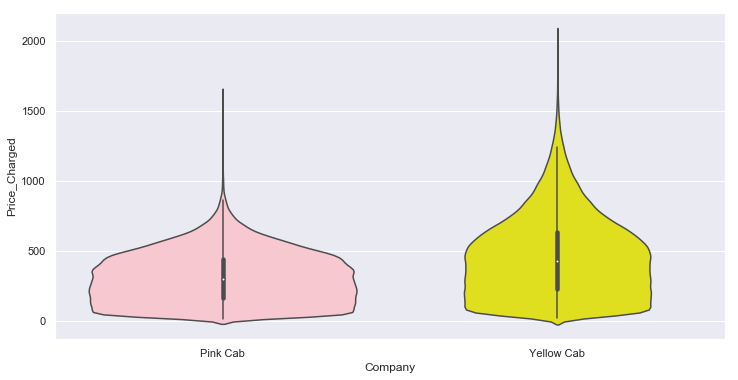

In [46]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

# Specifying a color for each distribution
my_pal = {"Pink Cab": "pink", "Yellow Cab": "yellow"}

# usual boxplot, plotted on a matplotlib.axes object named ax
ax = sns.violinplot(x="Company", 
                 y="Price_Charged", 
                 data=dataset,
                 order=["Pink Cab", "Yellow Cab"], 
                 palette= my_pal)

C:\Users\anmul\anaconda3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


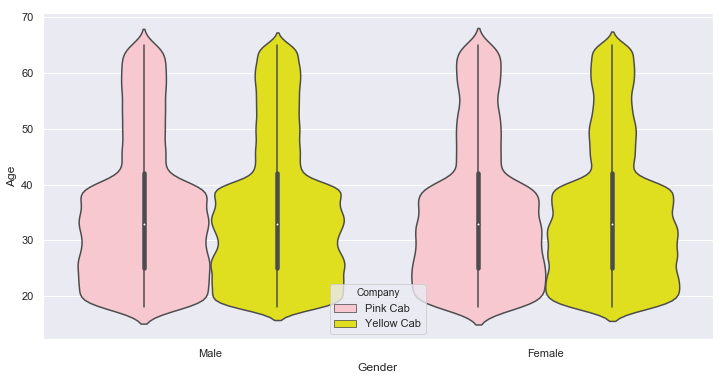

In [47]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

# Specifying a color for each distribution
my_pal = {"Pink Cab": "pink", "Yellow Cab": "yellow"}

ax = sns.violinplot(x="Gender", 
            y="Age",
            hue="Company", 
            data=dataset, 
            palette= my_pal)

In [48]:
dataset.corr()

Transaction_ID  Customer_ID  KM_Travelled  Price_Charged  \
Transaction_ID          1.000000    -0.016912     -0.001429      -0.052902   
Customer_ID            -0.016912     1.000000      0.000389      -0.177324   
KM_Travelled           -0.001429     0.000389      1.000000       0.835753   
Price_Charged          -0.052902    -0.177324      0.835753       1.000000   
Cost_of_Trip           -0.003462     0.003077      0.981848       0.859812   
Profit                 -0.087130    -0.306527      0.462768       0.864154   
Age                    -0.001267    -0.004735     -0.000369      -0.003084   
Income                 -0.001570    -0.013608     -0.000544       0.003228   
Population              0.023868    -0.647052     -0.002311       0.326589   
Users                   0.013526    -0.610742     -0.000428       0.281061   
Percentage_Users       -0.022612     0.805490      0.002305      -0.150070   

                  Cost_of_Trip    Profit       Age    Income  Population  \
Transaction_ID       -0.003462 -0.087130 -0.001267 -0.001570    0.023868   
Customer_ID           0.003077 -0.306527 -0.004735 -0.013608   -0.647052   
KM_Travelled          0.981848  0.462768 -0.000369 -0.000544   -0.002311   
Price_Charged         0.859812  0.864154 -0.003084  0.003228    0.326589   
Cost_of_Trip          1.000000  0.486056 -0.000189 -0.000633    0.015108   
Profit                0.486056  1.000000 -0.005093  0.006148    0.544079   
Age                  -0.000189 -0.005093  1.000000  0.003907   -0.009002   
Income               -0.000633  0.006148  0.003907  1.000000    0.011868   
Population            0.015108  0.544079 -0.009002  0.011868    1.000000   
Users                 0.023628  0.457758 -0.005906  0.010464    0.915490   
Percentage_Users      0.018128 -0.274715 -0.001778 -0.009332   -0.498707   

                     Users  Percentage_Users  
Transaction_ID    0.013526         -0.022612  
Customer_ID      -0.610742          0.805490  
KM_Travelled     -0.000428          0.002305  
Price_Charged     0.281061         -0.150070  
Cost_of_Trip      0.023628          0.018128  
Profit            0.457758         -0.274715  
Age              -0.005906         -0.001778  
Income            0.010464         -0.009332  
Population        0.915490         -0.498707  
Users             1.000000         -0.258919  
Percentage_Users -0.258919          1.000000

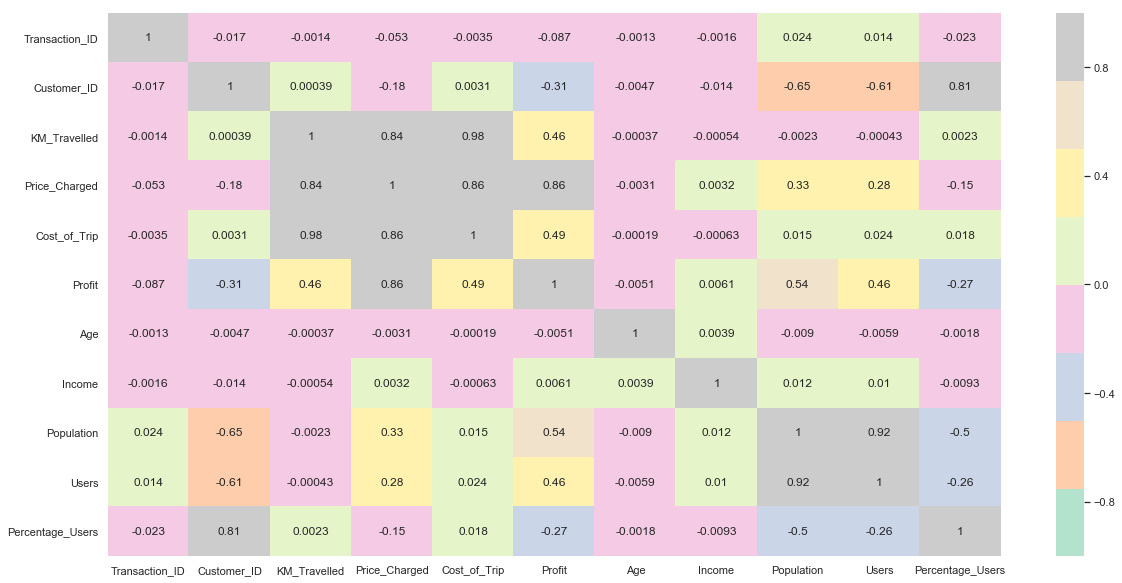

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap="Pastel2")

In [50]:
#sns.pairplot(dataset)
#plt.show()

# Analysis By Date

In [51]:
dataset.Date_of_Travel.nunique()

1095

In [52]:
dataset.groupby(['Date_of_Travel','Company']).Transaction_ID.count().head(20)

Date_of_Travel  Company   
2016-01-02      Pink Cab       41
                Yellow Cab    140
2016-01-03      Pink Cab       52
                Yellow Cab    126
2016-01-04      Pink Cab        4
                Yellow Cab     21
2016-01-05      Pink Cab        6
                Yellow Cab     41
2016-01-06      Pink Cab       23
                Yellow Cab     86
2016-01-07      Pink Cab       24
                Yellow Cab    117
2016-01-08      Pink Cab       21
                Yellow Cab     90
2016-01-09      Pink Cab       57
                Yellow Cab    232
2016-01-10      Pink Cab       67
                Yellow Cab    205
2016-01-11      Pink Cab       13
                Yellow Cab     72
Name: Transaction_ID, dtype: int64

In [53]:
dataset_date = dataset.copy()

In [54]:
months=[]
years =[]
for i in range(len(dataset_date['Date_of_Travel'])):
    months.append(dataset_date['Date_of_Travel'][i].month)
    years.append(dataset_date['Date_of_Travel'][i].year)
dataset_date['Month'] = months
dataset_date['Year'] = years

dataset_date = dataset_date.drop(['Date_of_Travel'],axis=1)

In [55]:
dataset_date

Transaction_ID  Customer_ID     Company           City  KM_Travelled  \
0             10000011        29290    Pink Cab     ATLANTA GA         30.45   
1             10000012        27703    Pink Cab     ATLANTA GA         28.62   
2             10000013        28712    Pink Cab     ATLANTA GA          9.04   
3             10000014        28020    Pink Cab     ATLANTA GA         33.17   
4             10000015        27182    Pink Cab     ATLANTA GA          8.73   
...                ...          ...         ...            ...           ...   
359387        10440101        52392  Yellow Cab  WASHINGTON DC          4.80   
359388        10440104        53286  Yellow Cab  WASHINGTON DC          8.40   
359389        10440105        52265  Yellow Cab  WASHINGTON DC         27.75   
359390        10440106        52175  Yellow Cab  WASHINGTON DC          8.80   
359391        10440107        52917  Yellow Cab  WASHINGTON DC         12.76   

        Price_Charged  Cost_of_Trip   Profit Payment_Mode Gender  Age  Income  \
0              370.95      313.6350  57.3150         Card   Male   28   10813   
1              358.52      334.8540  23.6660         Card   Male   27    9237   
2              125.20       97.6320  27.5680         Cash   Male   53   11242   
3              377.40      351.6020  25.7980         Cash   Male   23   23327   
4              114.62       97.7760  16.8440         Card   Male   33    8536   
...               ...           ...      ...          ...    ...  ...     ...   
359387          69.24       63.3600   5.8800         Cash   Male   24   15651   
359388         113.75      106.8480   6.9020         Cash   Male   32    6528   
359389         437.07      349.6500  87.4200         Cash   Male   56    7966   
359390         146.19      114.0480  32.1420         Card   Male   32    6423   
359391         191.58      177.6192  13.9608         Card   Male   20   11284   

        Population   Users  Percentage_Users  Month  Year  
0           814885   24701          3.031225      1  2016  
1           814885   24701          3.031225      1  2016  
2           814885   24701          3.031225      1  2016  
3           814885   24701          3.031225      1  2016  
4           814885   24701          3.031225      1  2016  
...            ...     ...               ...    ...   ...  
359387      418859  127001         30.320705      1  2018  
359388      418859  127001         30.320705      1  2018  
359389      418859  127001         30.320705      1  2018  
359390      418859  127001         30.320705      1  2018  
359391      418859  127001         30.320705      1  2018  

[359392 rows x 17 columns]

In [56]:
monthly_transactions = dataset_date.groupby(['Month']).Transaction_ID.count()
monthly_transactions

Month
1     23174
2     18307
3     21646
4     21434
5     23701
6     24713
7     27676
8     31323
9     36859
10    40852
11    42700
12    47007
Name: Transaction_ID, dtype: int64

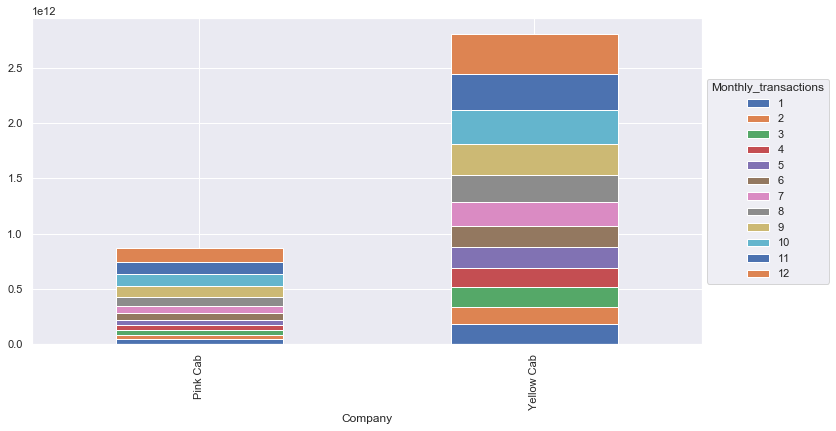

In [57]:
gb = dataset_date.groupby(['Company', 'Month']).Transaction_ID.sum().unstack()
gb.plot.bar(stacked=True)
plt.legend(title='Monthly_transactions', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

1.There are more transactions done in "december" for both yellow and pink cab.

# Company Analysis

In [58]:
yearly_transactions = dataset_date.groupby(['Year','Company']).Transaction_ID.count()
yearly_transactions

Year  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
      Yellow Cab    94253
Name: Transaction_ID, dtype: int64

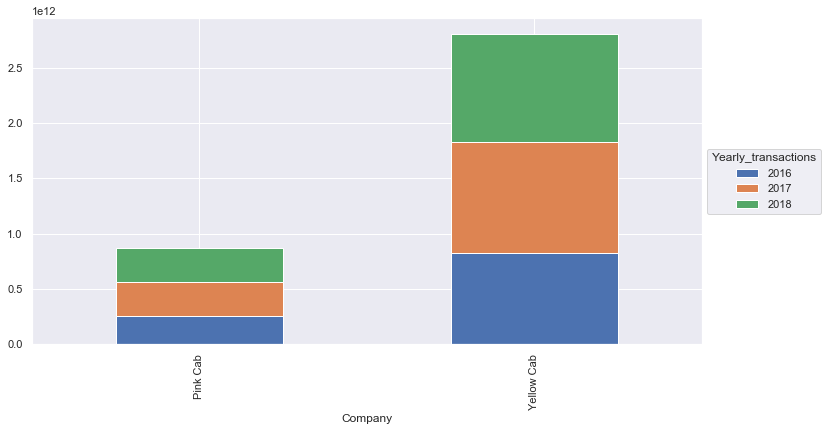

In [59]:
gb = dataset_date.groupby(['Company', 'Year']).Transaction_ID.sum().unstack()
gb.plot.bar(stacked=True)
plt.legend(title='Yearly_transactions', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

transactions in year 2016 are less compared to other year for both cabs.

In [60]:
monthly_profits = dataset_date.groupby(['Month','Company']).Profit.mean()
monthly_profits

Month  Company   
1      Pink Cab       76.736129
       Yellow Cab    185.374826
2      Pink Cab       74.678906
       Yellow Cab    199.302085
3      Pink Cab       70.825615
       Yellow Cab    180.865227
4      Pink Cab       60.205265
       Yellow Cab    177.254502
5      Pink Cab       33.994741
       Yellow Cab    212.557685
6      Pink Cab       39.597623
       Yellow Cab    190.079552
7      Pink Cab       45.809575
       Yellow Cab    135.709081
8      Pink Cab       50.168148
       Yellow Cab    121.110536
9      Pink Cab       51.194380
       Yellow Cab    152.287874
10     Pink Cab       65.850706
       Yellow Cab    140.392116
11     Pink Cab       73.632546
       Yellow Cab    145.427395
12     Pink Cab       89.008786
       Yellow Cab    146.033211
Name: Profit, dtype: float64

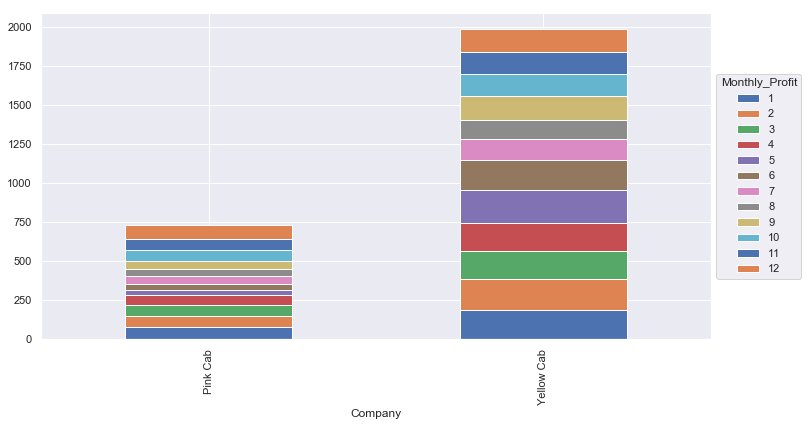

In [61]:
gb = dataset_date.groupby(['Company', 'Month']).Profit.mean().unstack()
gb.plot.bar(stacked=True)
plt.legend(title='Monthly_Profit', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

There is a clear picture showing more profit in the month of 'may' for yellow cab and for pink cab it is the month of 'december'.

In [62]:
yearly_profits = dataset_date.groupby(['Year','Company']).Profit.mean().unstack()
yearly_profits

Company   Pink Cab  Yellow Cab
Year                          
2016     68.321819  169.347821
2017     67.070839  168.817057
2018     53.229689  143.416122

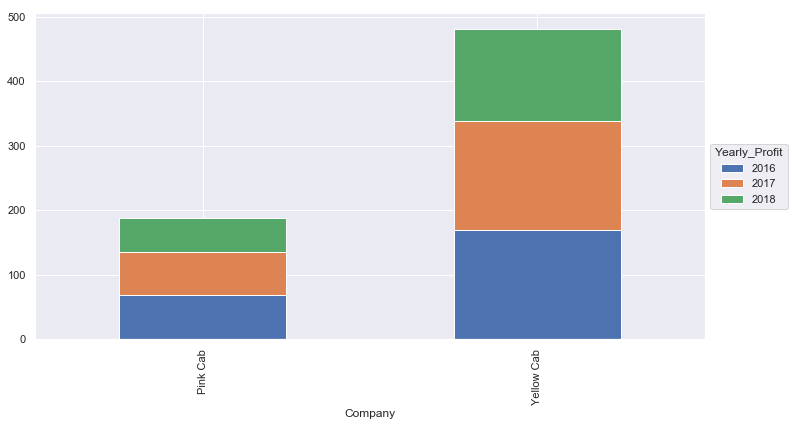

In [63]:
gb = dataset_date.groupby(['Company', 'Year']).Profit.mean().unstack()
gb.plot.bar(stacked=True)
plt.legend(title='Yearly_Profit', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

2017 brings more profit for pink and yellow cabs

In [64]:
yearly_kms = dataset_date.groupby(['Year','Company']).KM_Travelled.mean()
yearly_kms

Year  Company   
2016  Pink Cab      22.468488
      Yellow Cab    22.616742
2017  Pink Cab      22.618763
      Yellow Cab    22.557303
2018  Pink Cab      22.577275
      Yellow Cab    22.541036
Name: KM_Travelled, dtype: float64

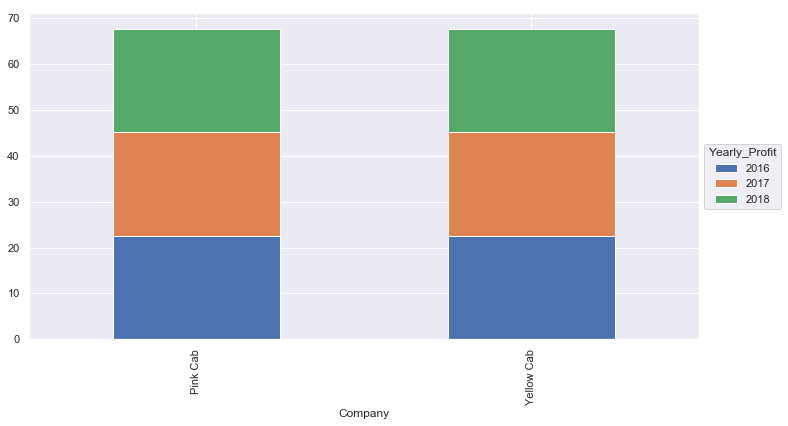

In [65]:
gb = dataset_date.groupby(['Company', 'Year']).KM_Travelled.mean().unstack()
gb.plot.bar(stacked=True)
plt.legend(title='Yearly_Profit', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In all three years both cabs travelled same distance still yellow cab brings more profit than pink cab.

C:\Users\anmul\anaconda3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\anmul\anaconda3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


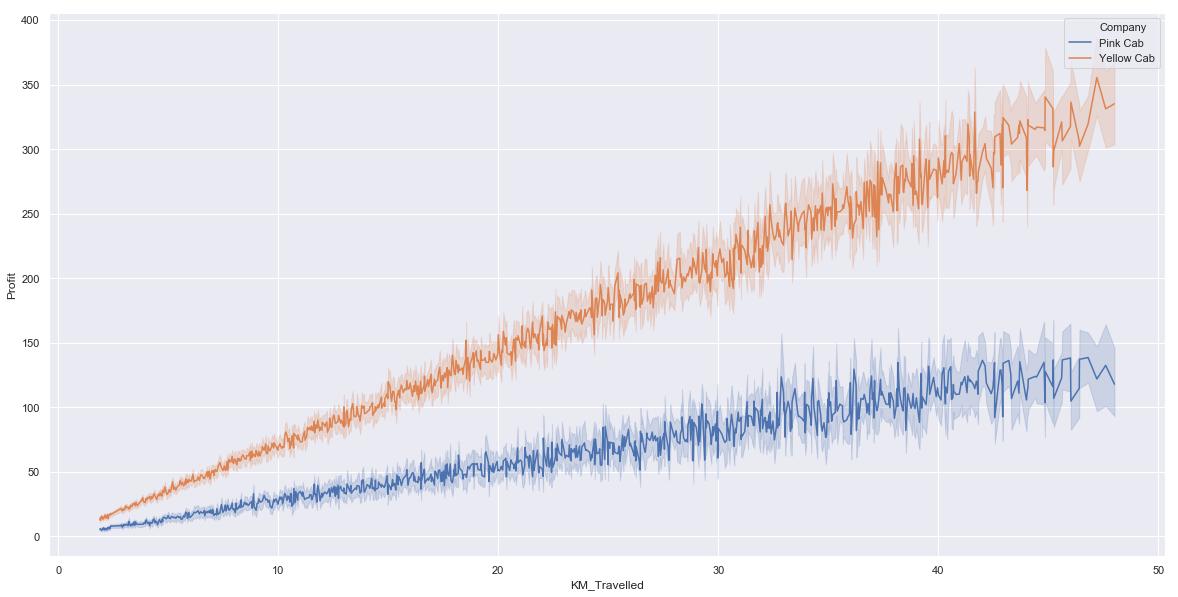

In [66]:
plt.figure(figsize=(20,10))

sns.lineplot(data=dataset_date, x="KM_Travelled", y="Profit", hue="Company")

# City Data Analysis

In [67]:
km_city = dataset_date.groupby(['City','Company']).KM_Travelled.sum()
km_city

City            Company   
ATLANTA GA      Pink Cab        39715.17
                Yellow Cab     128928.59
AUSTIN TX       Pink Cab        41038.42
                Yellow Cab      68168.88
BOSTON MA       Pink Cab       117933.51
                Yellow Cab     552454.67
CHICAGO IL      Pink Cab       210726.13
                Yellow Cab    1070978.26
DALLAS TX       Pink Cab        30389.26
                Yellow Cab     127392.79
DENVER CO       Pink Cab        31308.15
                Yellow Cab      54561.60
LOS ANGELES CA  Pink Cab       449656.77
                Yellow Cab     639078.88
MIAMI FL        Pink Cab        44644.45
                Yellow Cab     100773.72
NASHVILLE TN    Pink Cab        41474.17
                Yellow Cab      26850.57
NEW YORK NY     Pink Cab       315967.27
                Yellow Cab    1932842.47
ORANGE COUNTY   Pink Cab        33608.50
                Yellow Cab      55218.19
PHOENIX AZ      Pink Cab        18789.74
                Yellow Cab    

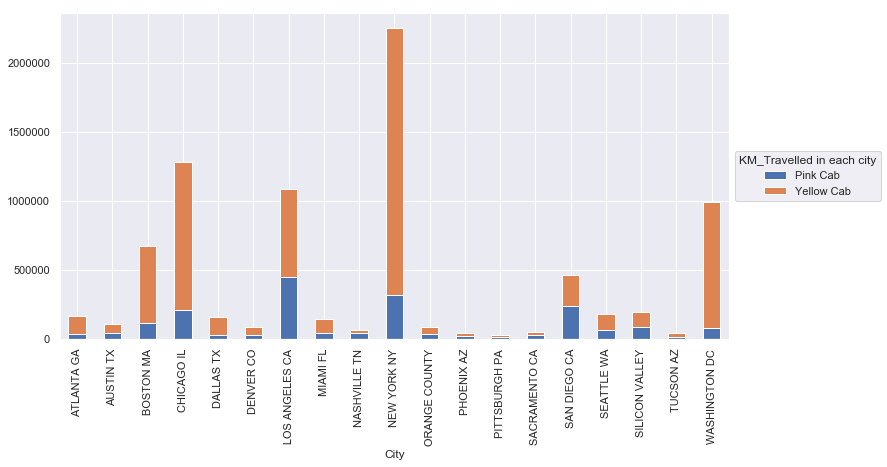

In [68]:
km_city = dataset_date.groupby(['City','Company']).KM_Travelled.sum().unstack()
km_city.plot.bar(stacked=True)
plt.legend(title='KM_Travelled in each city', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In the city newyork yellow cab travelled the most however in los angeles pink cab travelled the most.

In [69]:
city_trans = dataset_date.groupby('City').Transaction_ID.count()
city_trans

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

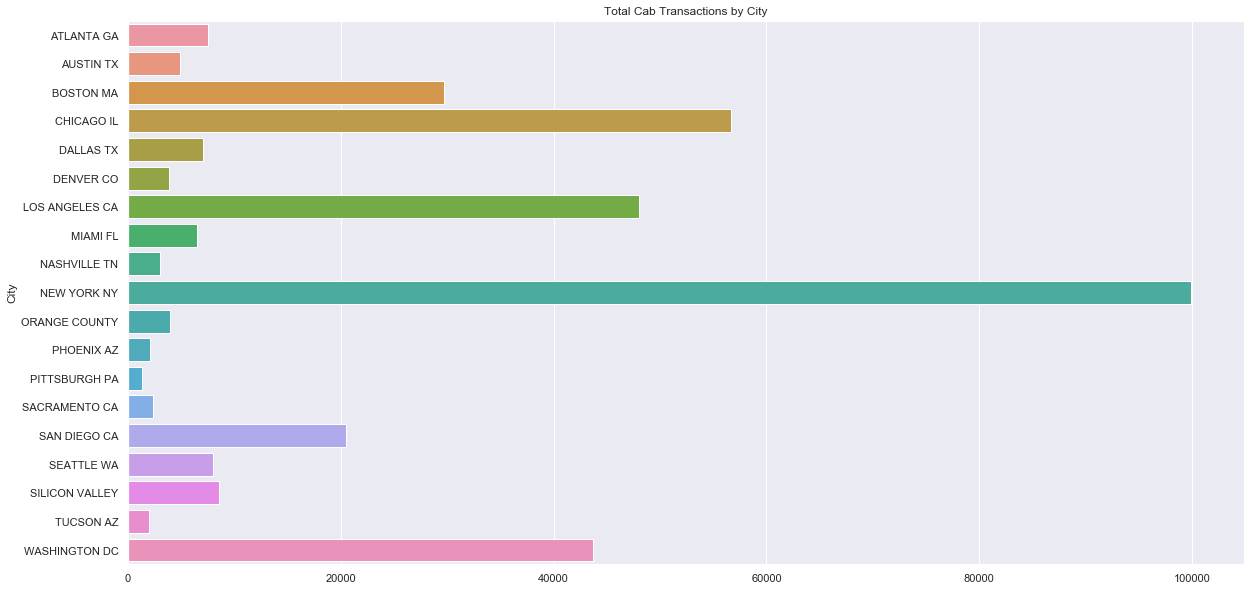

In [70]:
plt.figure(figsize = (20,10))
sns.barplot(x = city_trans.values, y = city_trans.index)
plt.title('Total Cab Transactions by City')
plt.show()

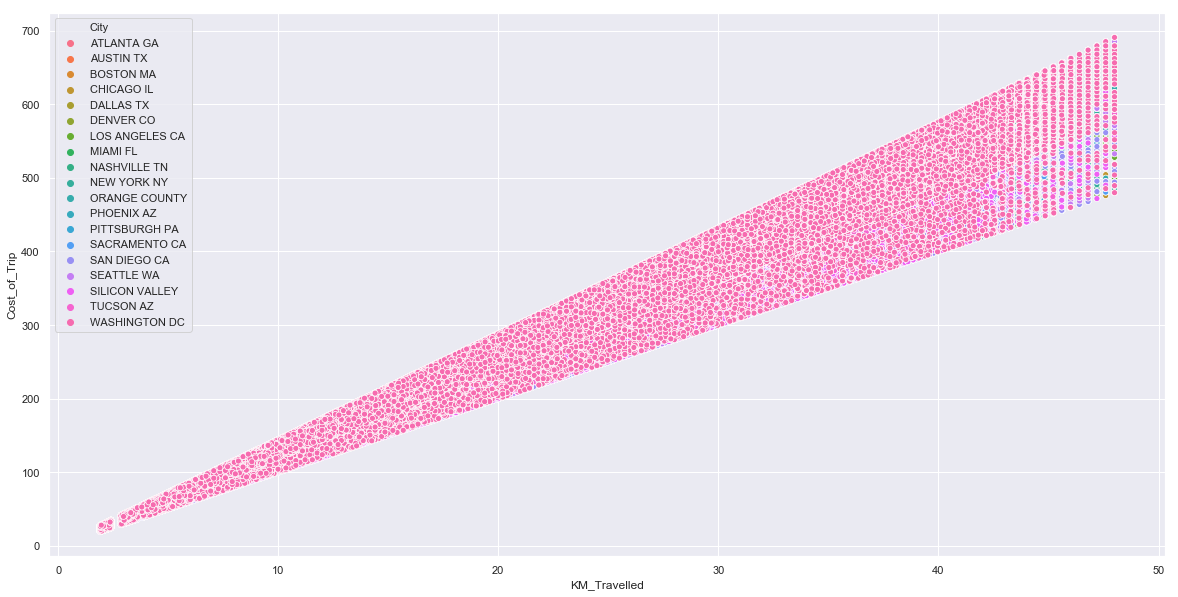

In [71]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset_date, x="KM_Travelled", y="Cost_of_Trip", hue="City")

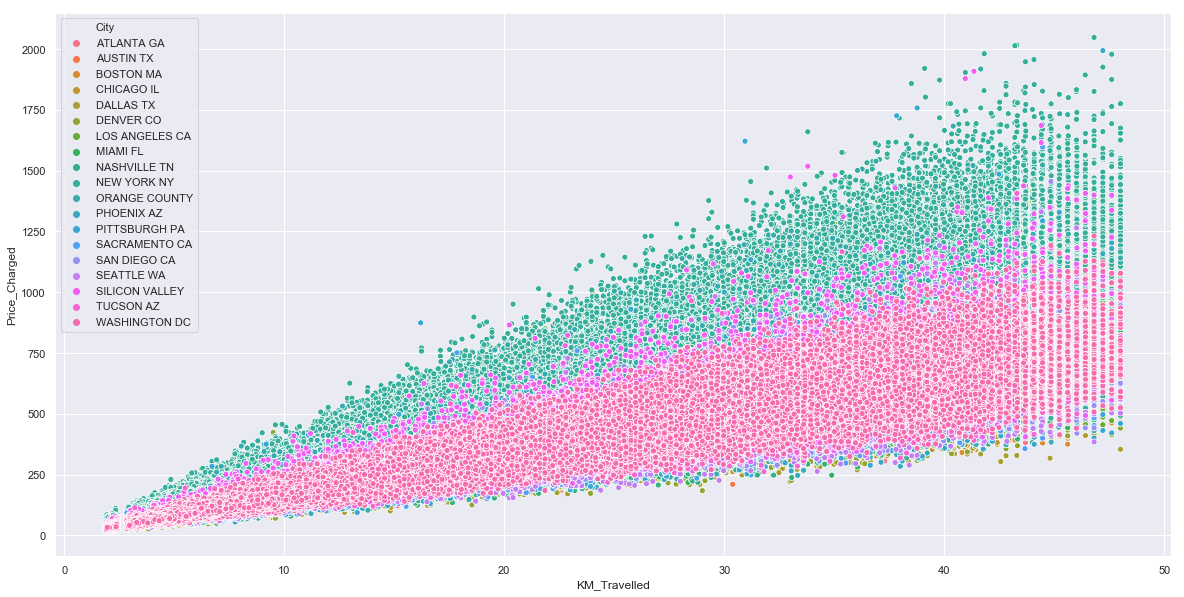

In [72]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset_date, x="KM_Travelled", y="Price_Charged", hue="City")

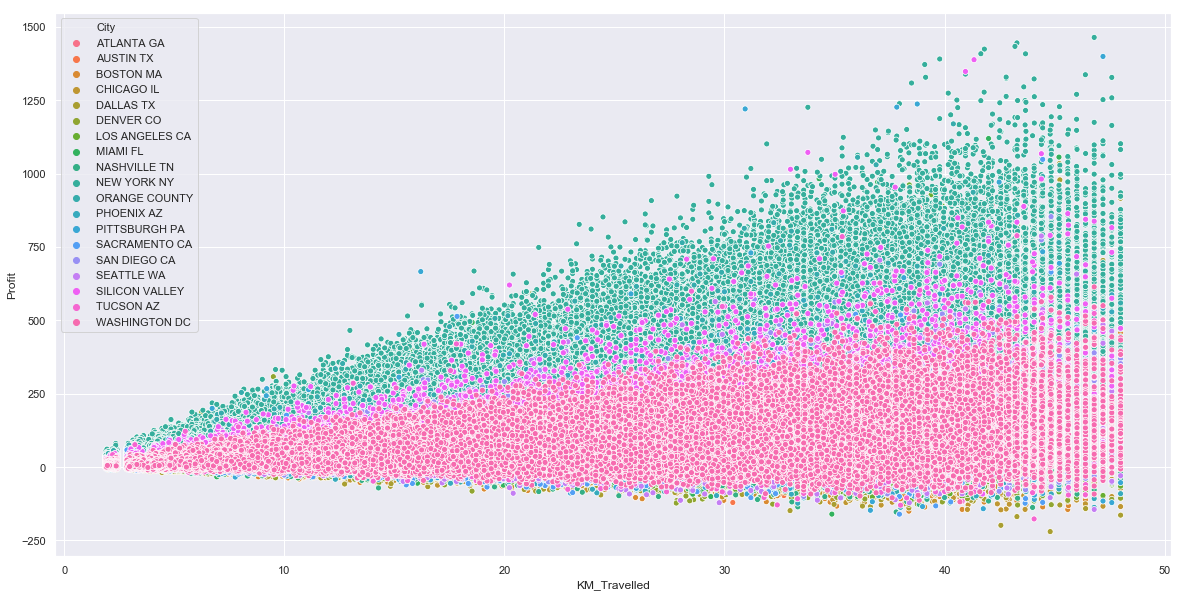

In [73]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset_date, x="KM_Travelled", y="Profit", hue="City")

# Payment Mode and Gender Share

In [74]:
payments = dataset_date.groupby(['Company','Payment_Mode']).Price_Charged.mean()
payments

Company     Payment_Mode
Pink Cab    Card            311.197319
            Cash            310.209299
Yellow Cab  Card            457.924979
            Cash            458.567368
Name: Price_Charged, dtype: float64

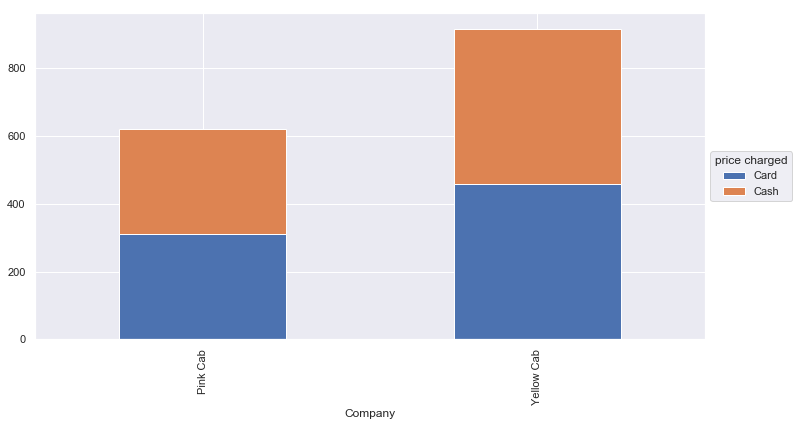

In [75]:
payments = dataset_date.groupby(['Company','Payment_Mode']).Price_Charged.mean().unstack()
payments.plot.bar(stacked=True)
plt.legend(title='price charged', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

price charged are nealy same in both cabs

In [76]:
dataset_date[dataset_date.Price_Charged>100].groupby('Payment_Mode').Payment_Mode.count()

Payment_Mode
Card    193758
Cash    129278
Name: Payment_Mode, dtype: int64

In [77]:
dataset_date[dataset_date.Price_Charged<=100].groupby('Payment_Mode').Payment_Mode.count()

Payment_Mode
Card    21746
Cash    14610
Name: Payment_Mode, dtype: int64

In [78]:
gender = dataset_date.groupby(['Company','Gender']).Price_Charged.mean()
gender

Company     Gender
Pink Cab    Female    310.624823
            Male      310.940547
Yellow Cab  Female    454.571538
            Male      460.821326
Name: Price_Charged, dtype: float64

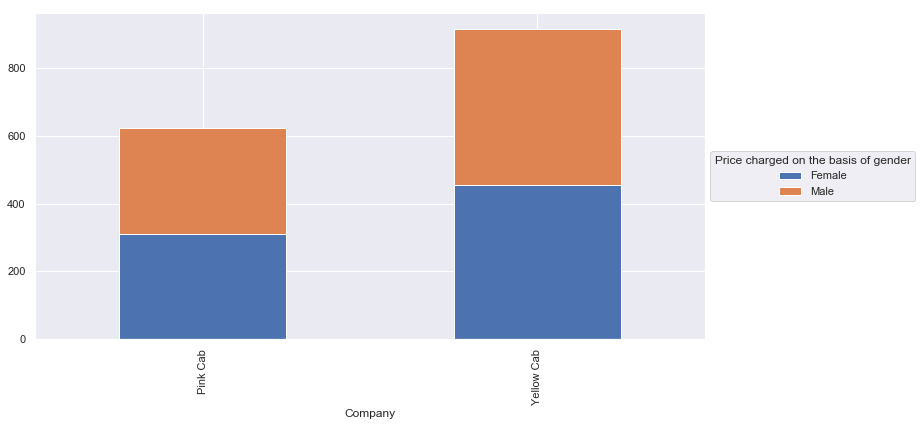

In [79]:
gender = dataset_date.groupby(['Company','Gender']).Price_Charged.mean().unstack()
gender.plot.bar(stacked=True)
plt.legend(title='Price charged on the basis of gender', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In yellow cab women are sligly less charged than men.

# income analysis

In [80]:
bins = [2004,15003, 25003, 35000]
labels = ['poor_class', 'middle_class','rich_class']
dataset_date['income_range'] = pd.cut(dataset_date.Income, bins, labels = labels,include_lowest = True)

dataset_date

Transaction_ID  Customer_ID     Company           City  KM_Travelled  \
0             10000011        29290    Pink Cab     ATLANTA GA         30.45   
1             10000012        27703    Pink Cab     ATLANTA GA         28.62   
2             10000013        28712    Pink Cab     ATLANTA GA          9.04   
3             10000014        28020    Pink Cab     ATLANTA GA         33.17   
4             10000015        27182    Pink Cab     ATLANTA GA          8.73   
...                ...          ...         ...            ...           ...   
359387        10440101        52392  Yellow Cab  WASHINGTON DC          4.80   
359388        10440104        53286  Yellow Cab  WASHINGTON DC          8.40   
359389        10440105        52265  Yellow Cab  WASHINGTON DC         27.75   
359390        10440106        52175  Yellow Cab  WASHINGTON DC          8.80   
359391        10440107        52917  Yellow Cab  WASHINGTON DC         12.76   

        Price_Charged  Cost_of_Trip   Profit Payment_Mode Gender  Age  Income  \
0              370.95      313.6350  57.3150         Card   Male   28   10813   
1              358.52      334.8540  23.6660         Card   Male   27    9237   
2              125.20       97.6320  27.5680         Cash   Male   53   11242   
3              377.40      351.6020  25.7980         Cash   Male   23   23327   
4              114.62       97.7760  16.8440         Card   Male   33    8536   
...               ...           ...      ...          ...    ...  ...     ...   
359387          69.24       63.3600   5.8800         Cash   Male   24   15651   
359388         113.75      106.8480   6.9020         Cash   Male   32    6528   
359389         437.07      349.6500  87.4200         Cash   Male   56    7966   
359390         146.19      114.0480  32.1420         Card   Male   32    6423   
359391         191.58      177.6192  13.9608         Card   Male   20   11284   

        Population   Users  Percentage_Users  Month  Year  income_range  
0           814885   24701          3.031225      1  2016    poor_class  
1           814885   24701          3.031225      1  2016    poor_class  
2           814885   24701          3.031225      1  2016    poor_class  
3           814885   24701          3.031225      1  2016  middle_class  
4           814885   24701          3.031225      1  2016    poor_class  
...            ...     ...               ...    ...   ...           ...  
359387      418859  127001         30.320705      1  2018  middle_class  
359388      418859  127001         30.320705      1  2018    poor_class  
359389      418859  127001         30.320705      1  2018    poor_class  
359390      418859  127001         30.320705      1  2018    poor_class  
359391      418859  127001         30.320705      1  2018    poor_class  

[359392 rows x 18 columns]

In [81]:
Income_range_share = dataset_date.groupby('income_range').Customer_ID.nunique()
Income_range_share

income_range
poor_class      23741
middle_class    18181
rich_class       4221
Name: Customer_ID, dtype: int64

Text(0.5,1,'Total Customers by Income Range')

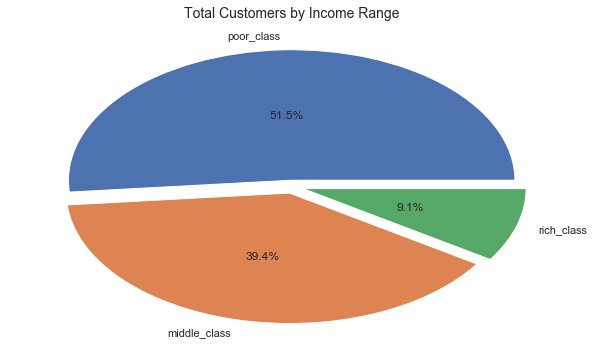

In [82]:
pie, ax = plt.subplots(figsize=[10,6])
labels = Income_range_share.keys()
plt.pie(x=Income_range_share, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Total Customers by Income Range", fontsize=14)

Nearly 51.5% profits bring by poor class people

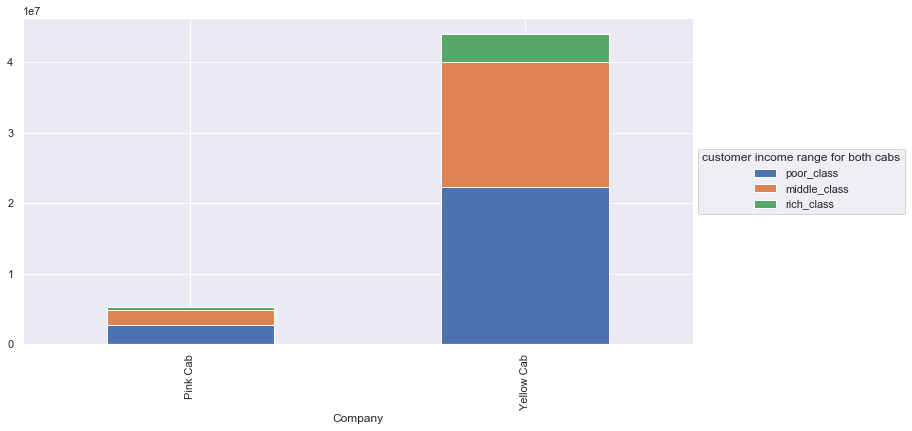

In [83]:
gb = dataset_date.groupby(['Company', 'income_range']).Profit.sum().unstack()
gb.plot.bar(stacked=True)
plt.legend(title='customer income range for both cabs', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Age Analysis

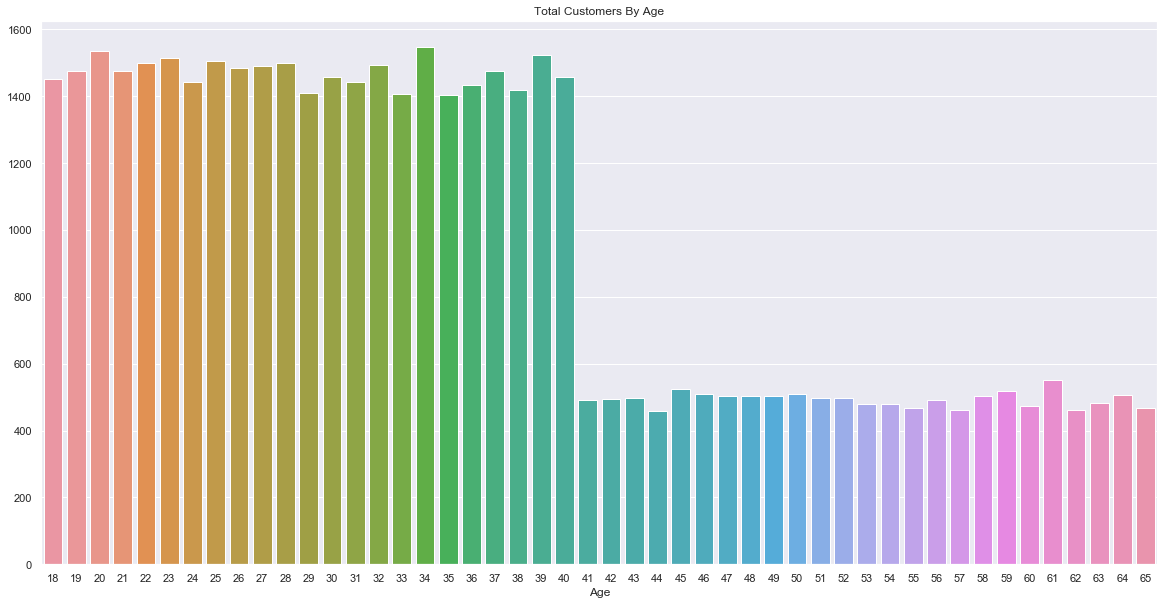

In [84]:
customers_by_age = dataset_date.groupby('Age').Customer_ID.nunique()

plt.figure(figsize=(20,10))
sns.barplot(x=customers_by_age.index,y=customers_by_age.values)
plt.title('Total Customers By Age')
plt.show()

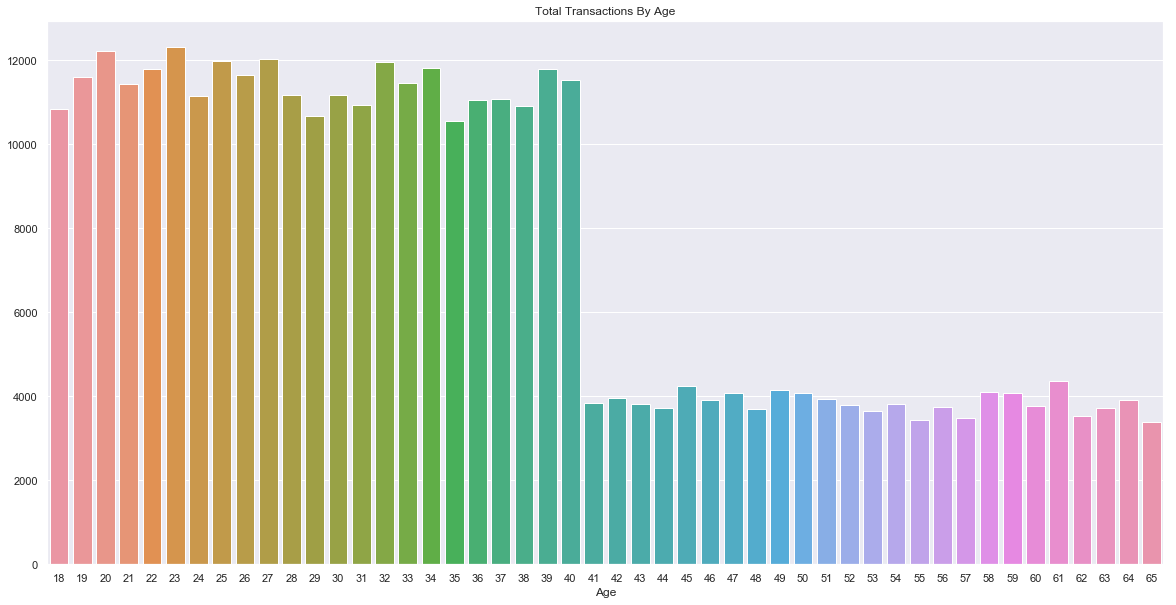

In [85]:
transactions_by_age = dataset_date.groupby('Age').Transaction_ID.count()

plt.figure(figsize=(20,10))
sns.barplot(x=transactions_by_age.index,y=transactions_by_age.values)
plt.title('Total Transactions By Age')
plt.show()

In [86]:
mean_age = dataset_date.groupby('Company').Age.mean()
mean_age

Company
Pink Cab      35.322414
Yellow Cab    35.341112
Name: Age, dtype: float64

In [87]:
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
dataset_date['Age_range'] = pd.cut(dataset_date.Age, bins, labels = labels,include_lowest = True)

dataset_date

Transaction_ID  Customer_ID     Company           City  KM_Travelled  \
0             10000011        29290    Pink Cab     ATLANTA GA         30.45   
1             10000012        27703    Pink Cab     ATLANTA GA         28.62   
2             10000013        28712    Pink Cab     ATLANTA GA          9.04   
3             10000014        28020    Pink Cab     ATLANTA GA         33.17   
4             10000015        27182    Pink Cab     ATLANTA GA          8.73   
...                ...          ...         ...            ...           ...   
359387        10440101        52392  Yellow Cab  WASHINGTON DC          4.80   
359388        10440104        53286  Yellow Cab  WASHINGTON DC          8.40   
359389        10440105        52265  Yellow Cab  WASHINGTON DC         27.75   
359390        10440106        52175  Yellow Cab  WASHINGTON DC          8.80   
359391        10440107        52917  Yellow Cab  WASHINGTON DC         12.76   

        Price_Charged  Cost_of_Trip   Profit Payment_Mode Gender  Age  Income  \
0              370.95      313.6350  57.3150         Card   Male   28   10813   
1              358.52      334.8540  23.6660         Card   Male   27    9237   
2              125.20       97.6320  27.5680         Cash   Male   53   11242   
3              377.40      351.6020  25.7980         Cash   Male   23   23327   
4              114.62       97.7760  16.8440         Card   Male   33    8536   
...               ...           ...      ...          ...    ...  ...     ...   
359387          69.24       63.3600   5.8800         Cash   Male   24   15651   
359388         113.75      106.8480   6.9020         Cash   Male   32    6528   
359389         437.07      349.6500  87.4200         Cash   Male   56    7966   
359390         146.19      114.0480  32.1420         Card   Male   32    6423   
359391         191.58      177.6192  13.9608         Card   Male   20   11284   

        Population   Users  Percentage_Users  Month  Year  income_range  \
0           814885   24701          3.031225      1  2016    poor_class   
1           814885   24701          3.031225      1  2016    poor_class   
2           814885   24701          3.031225      1  2016    poor_class   
3           814885   24701          3.031225      1  2016  middle_class   
4           814885   24701          3.031225      1  2016    poor_class   
...            ...     ...               ...    ...   ...           ...   
359387      418859  127001         30.320705      1  2018  middle_class   
359388      418859  127001         30.320705      1  2018    poor_class   
359389      418859  127001         30.320705      1  2018    poor_class   
359390      418859  127001         30.320705      1  2018    poor_class   
359391      418859  127001         30.320705      1  2018    poor_class   

       Age_range  
0          20-29  
1          20-29  
2          50-59  
3          20-29  
4          30-39  
...          ...  
359387     20-29  
359388     30-39  
359389     50-59  
359390     30-39  
359391     20-29  

[359392 rows x 19 columns]

In [88]:
age_range_share = dataset_date.groupby('Age_range').Customer_ID.nunique()
age_range_share

Age_range
18-19     2925
20-29    14853
30-39    14598
40-49     5935
50-59     4899
60+       2938
Name: Customer_ID, dtype: int64

Text(0.5,1,'Total Customers by Age Range')

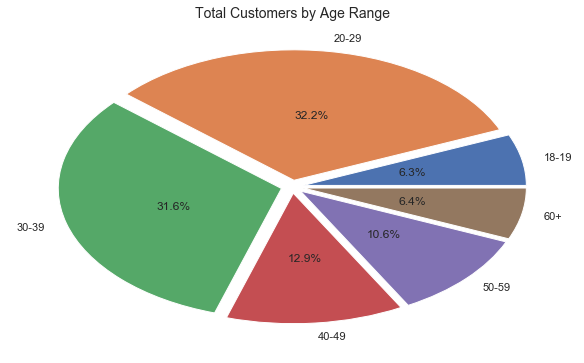

In [90]:
pie, ax = plt.subplots(figsize=[10,6])
labels = age_range_share.keys()
plt.pie(x=age_range_share, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Total Customers by Age Range", fontsize=14)

In [100]:
age_range_transactions = dataset_date.groupby(['Company', 'Age_range']).Transaction_ID.count()
age_range_transactions

Company     Age_range
Pink Cab    18-19         5497
            20-29        27470
            30-39        26408
            40-49        10931
            50-59         8976
            60+           5429
Yellow Cab  18-19        16940
            20-29        88960
            30-39        86327
            40-49        36086
            50-59        29111
            60+          17257
Name: Transaction_ID, dtype: int64

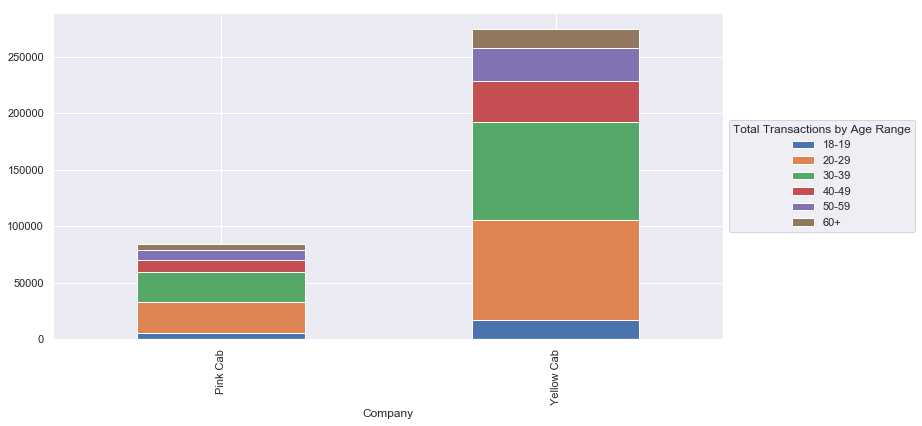

In [92]:
gb = dataset_date.groupby(['Company', 'Age_range']).Transaction_ID.count().unstack()
gb.plot.bar(stacked=True)
plt.legend(title='Total Transactions by Age Range', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

It looks like the ages in between 20-29 has done more transactions.

In [103]:
age_range_profit = dataset_date.groupby(['Company', 'Age_range']).Profit.mean()
age_range_profit

Company     Age_range
Pink Cab    18-19         63.425925
            20-29         63.225920
            30-39         62.611523
            40-49         61.572270
            50-59         62.269851
            60+           61.969832
Yellow Cab  18-19        155.240961
            20-29        162.041380
            30-39        159.907000
            40-49        162.637539
            50-59        158.805900
            60+          155.250721
Name: Profit, dtype: float64

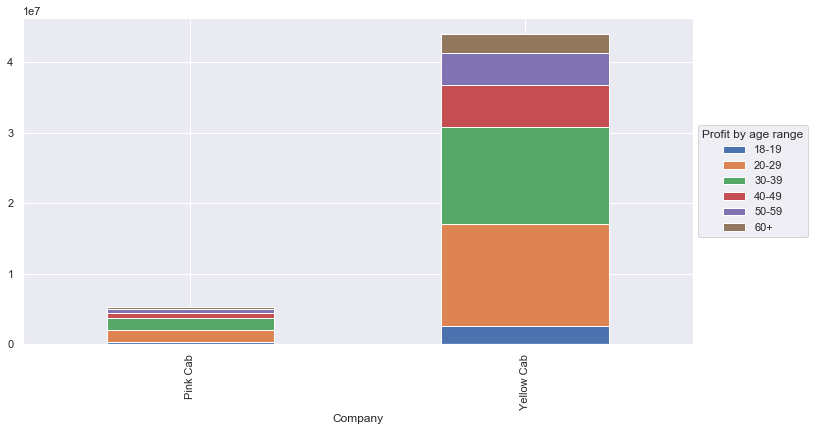

In [94]:
gb = dataset_date.groupby(['Company', 'Age_range']).Profit.sum().unstack()
gb.plot.bar(stacked=True)
plt.legend(title='Profit by age range', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Text(0.5,1,'Total Customers profit by Age Range')

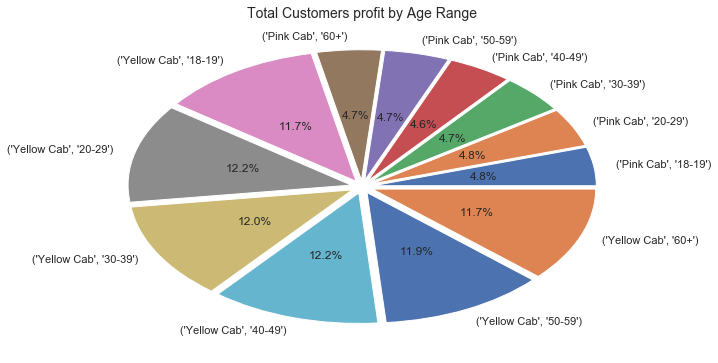

In [113]:
pie, ax = plt.subplots(figsize=[10,6])
labels = age_range_profit.keys()
plt.pie(x=age_range_profit, autopct="%.1f%%", explode=[0.05]*12, labels=labels, pctdistance=0.5)
plt.title("Total Customers profit by Age Range", fontsize=14)

both pink and yellow cabs got least profit from 18-19 age group

Text(0.5,1,'Total Transactions by Age Range')

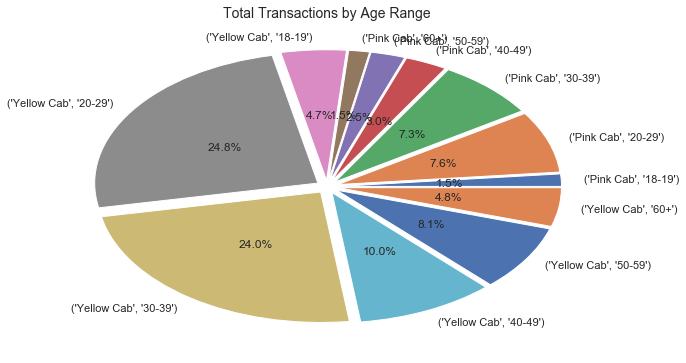

In [109]:
pie, ax = plt.subplots(figsize=[10,6])
labels = age_range_transactions.keys()
plt.pie(x=age_range_transactions, autopct="%.1f%%", explode=[0.05]*12, labels=labels, pctdistance=0.5)
plt.title("Total Transactions by Age Range", fontsize=14)

32.4% of total transactions done by age group of 20-29, however least transactions done by 18-19 age and 60+ age group 

In [110]:
age_range_company = dataset_date.groupby(['Age_range', 'Company']).Customer_ID.nunique()
age_range_company

Age_range  Company   
18-19      Pink Cab       2090
           Yellow Cab     2536
20-29      Pink Cab      10384
           Yellow Cab    12835
30-39      Pink Cab      10211
           Yellow Cab    12628
40-49      Pink Cab       4152
           Yellow Cab     5152
50-59      Pink Cab       3402
           Yellow Cab     4238
60+        Pink Cab       2091
           Yellow Cab     2507
Name: Customer_ID, dtype: int64

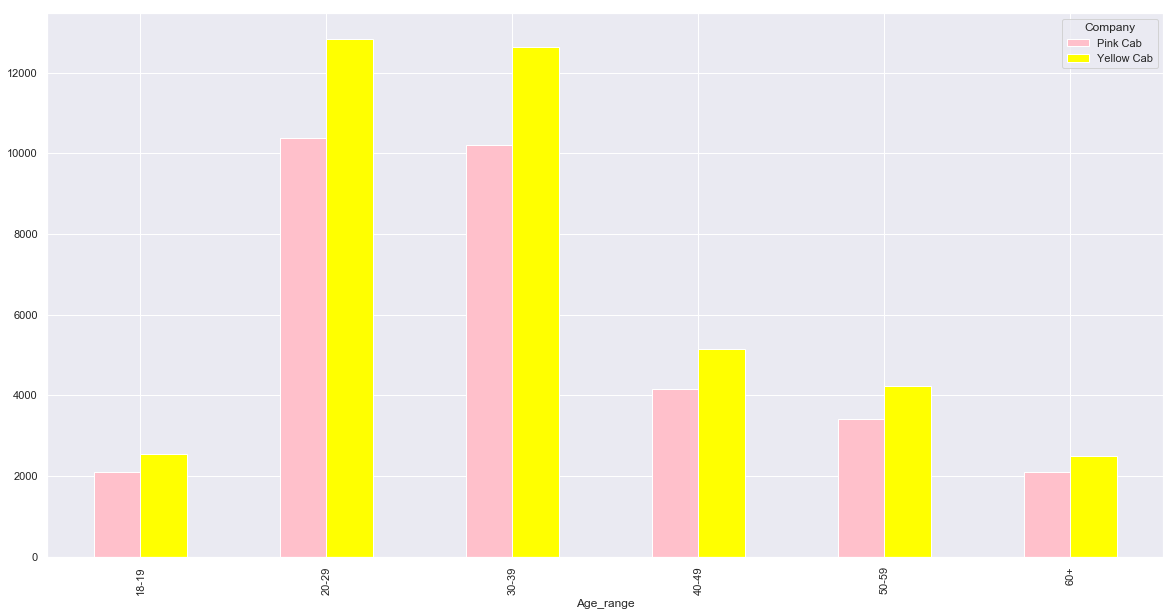

In [111]:
fig, ax = plt.subplots(figsize=(20,10))
age_range_company.unstack().plot(ax=ax,kind = 'bar', color = ['pink', 'yellow'])

age range 20 to 39 travelled more with pink and yellow cabs everyday using both cabs.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014327C60828>],
      dtype=object)

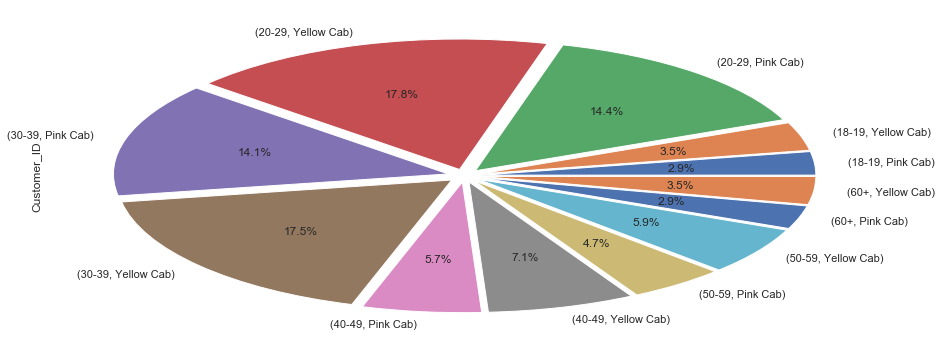

In [112]:
age_range_company.plot.pie(subplots=True, figsize=(15, 6), explode=[0.05]*12, autopct='%1.1f%%')

age range 20 to 39 travelled more with pink and yellow cabs everyday using both cabs.

# Gender Analysis

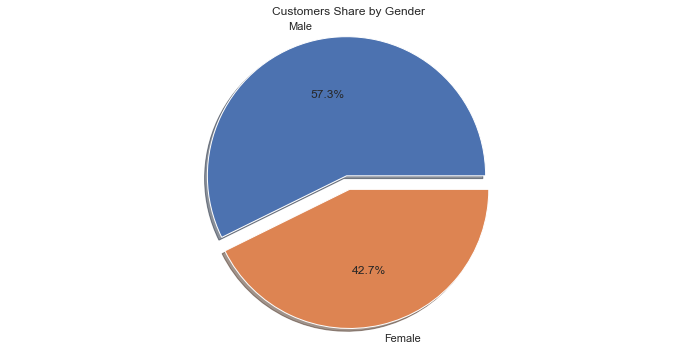

In [114]:
labelscg = 'Male','Female' 
pctcg = [dataset_date[(dataset_date.Gender=='Male') ]['Gender'].count(),dataset_date[(dataset_date.Gender=='Female')]['Gender'].count()]
figcg, axcg = plt.subplots()
axcg.pie(pctcg ,explode = [0.05]*2, labels=labelscg, autopct='%1.1f%%',shadow=True)
axcg.axis('equal')

plt.title('Customers Share by Gender')
plt.show()

57.3% of male and 42.7% of female travelled every day during time period.

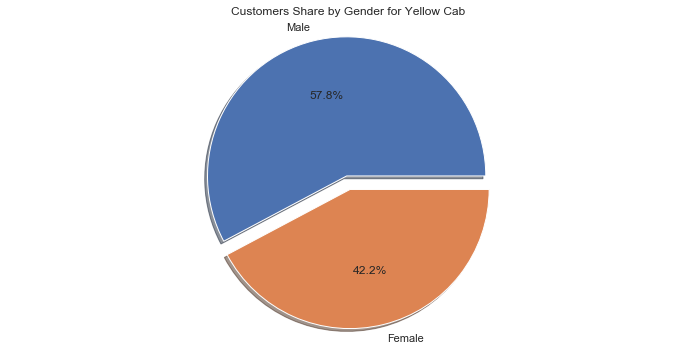

In [115]:
labelscgy = 'Male','Female' 
pctcgy = [dataset_date[(dataset_date.Gender=='Male') & (dataset_date.Company=='Yellow Cab')]['Gender'].count(),dataset_date[(dataset_date.Gender=='Female') & (dataset_date.Company=='Yellow Cab')]['Gender'].count()]
figcgy, axcgy = plt.subplots()
axcgy.pie(pctcgy ,explode = [0.05]*2, labels=labelscgy, autopct='%1.1f%%',shadow=True)
axcgy.axis('equal')

plt.title('Customers Share by Gender for Yellow Cab')
plt.show()

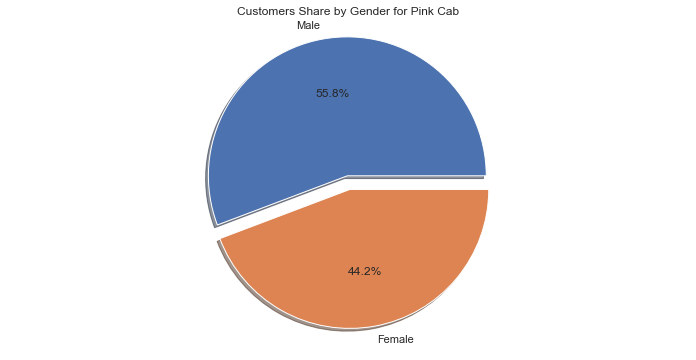

In [116]:
labelscgp = 'Male','Female' 
pctcgp = [dataset_date[(dataset_date.Gender=='Male') & (dataset_date.Company=='Pink Cab')]['Gender'].count(),dataset_date[(dataset_date.Gender=='Female') & (dataset_date.Company=='Pink Cab')]['Gender'].count()]
figcgp, axcgp = plt.subplots()
axcgp.pie(pctcgp ,explode = [0.05]*2, labels=labelscgp, autopct='%1.1f%%',shadow=True)
axcgp.axis('equal')

plt.title('Customers Share by Gender for Pink Cab')
plt.show()

In yellow cab preffered more by male more like 57% however in pink cab preffered more by male 55.8%, female are still less in percentage in both cabs

In [117]:
gender_by_company = dataset_date.groupby(['Company', 'Gender']).Customer_ID.nunique()
gender_by_company

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

Text(0.5,1,'Customers Share by Gender by Company')

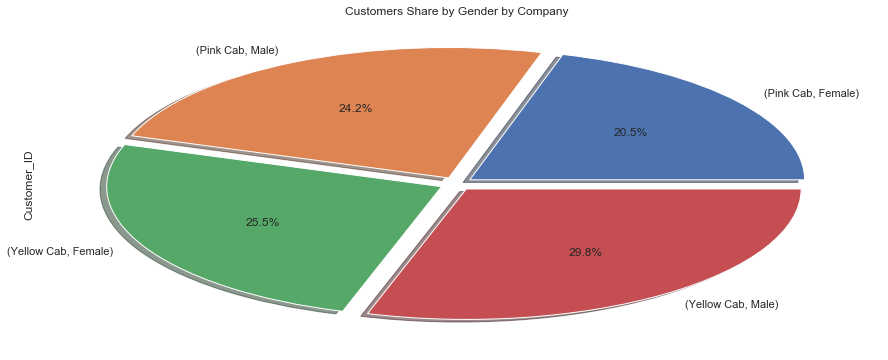

In [118]:
gender_by_company.plot.pie(subplots=True, figsize=(15, 6), explode=[0.05]*4, autopct='%1.1f%%', shadow=True)
plt.title('Customers Share by Gender by Company')

least number of female used pink cabs only 20.5% compared to others.

In [122]:
gender_analysis = dataset_date.groupby(['Company','Year','Gender']).Transaction_ID.count()
gender_analysis

Company     Year  Gender
Pink Cab    2016  Female    10873
                  Male      14207
            2017  Female    13475
                  Male      16846
            2018  Female    13132
                  Male      16178
Yellow Cab  2016  Female    33861
                  Male      48378
            2017  Female    41785
                  Male      56404
            2018  Female    40354
                  Male      53899
Name: Transaction_ID, dtype: int64

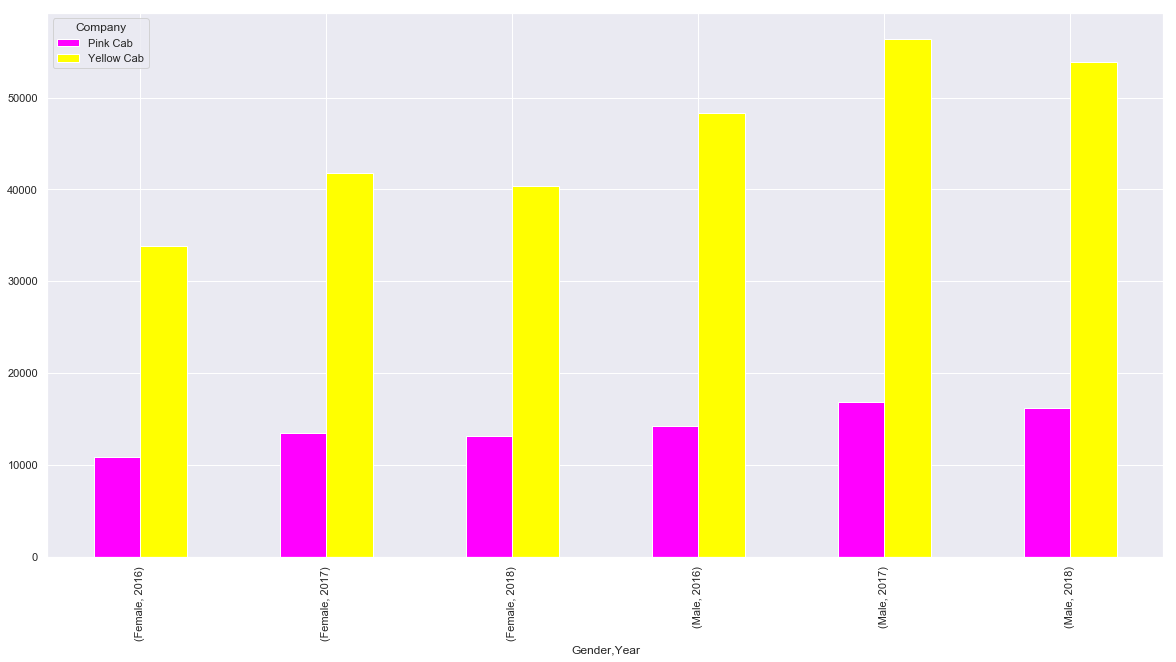

In [120]:
fig, ax = plt.subplots(figsize=(20,10))
dataset_date.groupby(['Gender','Year','Company']).Transaction_ID.count().unstack().plot(ax=ax,kind = 'bar', color = ['magenta', 'yellow'])

As we can see in bar chart in 2017 male used more yellow cabs and pink cabs in comparision with other years.

Text(0.5,1,'gender analysis by transaction id')

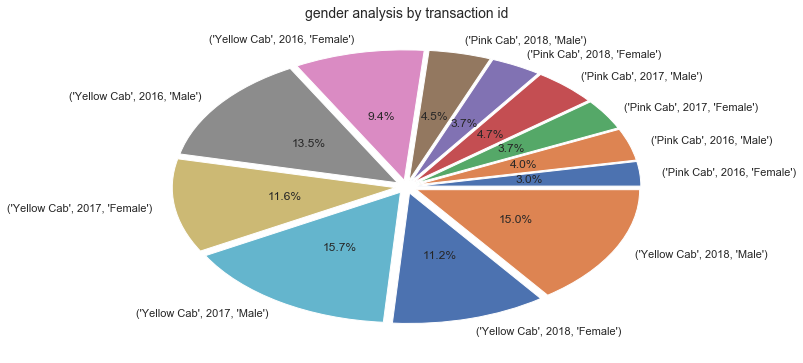

In [125]:
pie, ax = plt.subplots(figsize=[10,6])
labels = gender_analysis.keys()
plt.pie(x=gender_analysis, autopct="%.1f%%", explode=[0.05]*12, labels=labels, pctdistance=0.5)
plt.title("gender analysis by transaction id", fontsize=14)

In [126]:
gender_analysis_customer_id = dataset_date.groupby(['Company','Year','Gender']).Customer_ID.count()
gender_analysis_customer_id

Company     Year  Gender
Pink Cab    2016  Female    10873
                  Male      14207
            2017  Female    13475
                  Male      16846
            2018  Female    13132
                  Male      16178
Yellow Cab  2016  Female    33861
                  Male      48378
            2017  Female    41785
                  Male      56404
            2018  Female    40354
                  Male      53899
Name: Customer_ID, dtype: int64

Text(0.5,1,'gender analysis by Customer id')

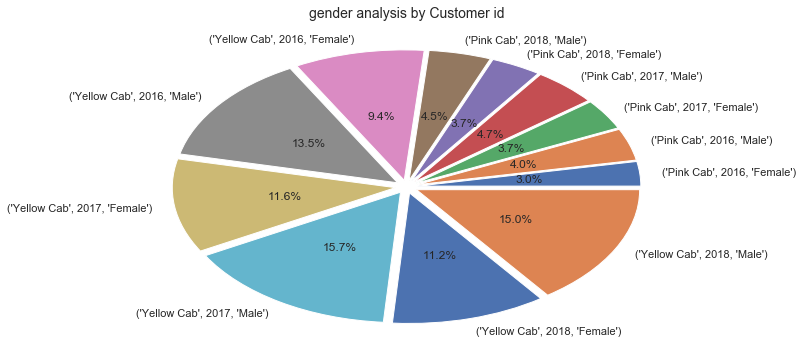

In [128]:
pie, ax = plt.subplots(figsize=[10,6])
labels = gender_analysis_customer_id.keys()
plt.pie(x=gender_analysis_customer_id, autopct="%.1f%%", explode=[0.05]*12, labels=labels, pctdistance=0.5)
plt.title("gender analysis by Customer id", fontsize=14)

In [130]:
gender_analysis_profit = dataset_date.groupby(['Company','Year','Gender']).Profit.mean()
gender_analysis_profit

Company     Year  Gender
Pink Cab    2016  Female     67.718353
                  Male       68.783668
            2017  Female     66.562150
                  Male       67.477735
            2018  Female     53.099761
                  Male       53.335154
Yellow Cab  2016  Female    164.830379
                  Male      172.509694
            2017  Female    165.230353
                  Male      171.474145
            2018  Female    139.910439
                  Male      146.040815
Name: Profit, dtype: float64

Text(0.5,1,'gender analysis by Profit')

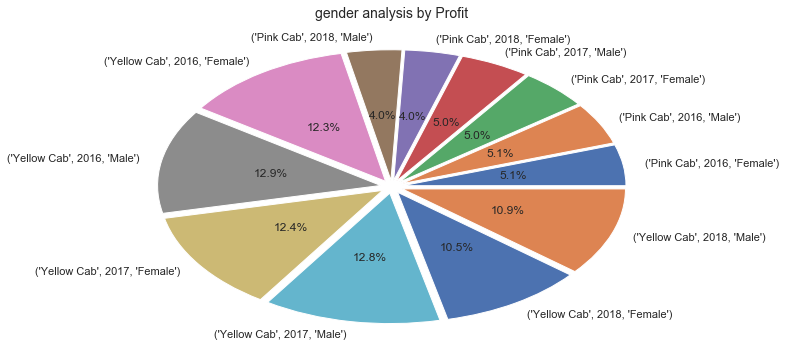

In [131]:
pie, ax = plt.subplots(figsize=[10,6])
labels = gender_analysis_profit.keys()
plt.pie(x=gender_analysis_profit, autopct="%.1f%%", explode=[0.05]*12, labels=labels, pctdistance=0.5)
plt.title("gender analysis by Profit", fontsize=14)

In [226]:
gender_analysis_KM = dataset_date.groupby(['Company','Year','Gender']).KM_Travelled.count()
gender_analysis_KM

Company     Year  Gender
Pink Cab    2016  Female    10873
                  Male      14207
            2017  Female    13475
                  Male      16846
            2018  Female    13132
                  Male      16178
Yellow Cab  2016  Female    33861
                  Male      48378
            2017  Female    41785
                  Male      56404
            2018  Female    40354
                  Male      53899
Name: KM_Travelled, dtype: int64

Text(0.5,1,'gender analysis by KM Travelled')

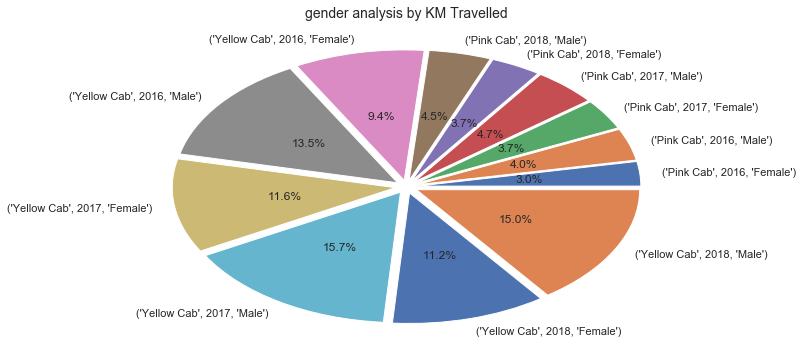

In [228]:
pie, ax = plt.subplots(figsize=[10,6])
labels =gender_analysis_KM.keys()
plt.pie(x=gender_analysis_KM, autopct="%.1f%%", explode=[0.05]*12, labels=labels, pctdistance=0.5)
plt.title("gender analysis by KM Travelled", fontsize=14)

# Customer Share Market

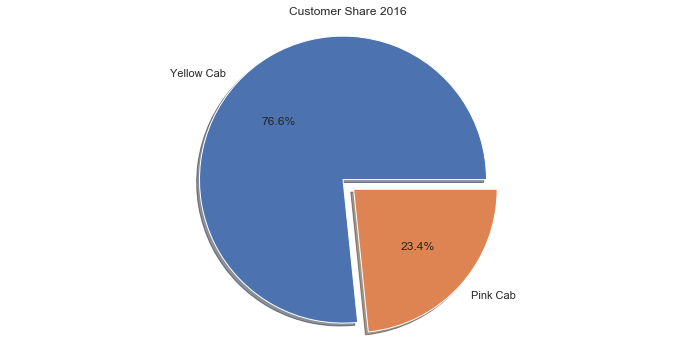

In [132]:
labels2016 = 'Yellow Cab','Pink Cab' 
pct2016 = [dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Yellow Cab')]['Customer_ID'].count(),dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Pink Cab')]['Customer_ID'].count()]
fig2016, ax2016 = plt.subplots()
ax2016.pie(pct2016 ,explode = [0.05]*2, labels=labels2016, autopct='%1.1f%%',shadow=True)
ax2016.axis('equal')

plt.title('Customer Share 2016')
plt.show()

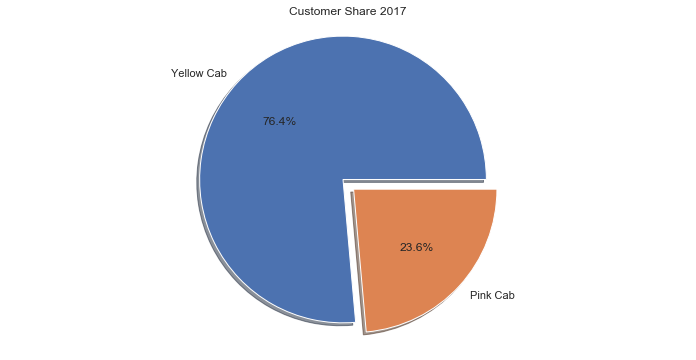

In [133]:
labels2017 = 'Yellow Cab','Pink Cab' 
pct2017 = [dataset_date[(dataset_date.Year==2017) & (dataset_date.Company=='Yellow Cab')]['Customer_ID'].count(),dataset_date[(dataset_date.Year==2017) & (dataset_date.Company=='Pink Cab')]['Customer_ID'].count()]
fig2017, ax2017 = plt.subplots()
ax2017.pie(pct2017 ,explode = [0.05]*2, labels=labels2017, autopct='%1.1f%%',shadow=True)
ax2017.axis('equal')

plt.title('Customer Share 2017')
plt.show()

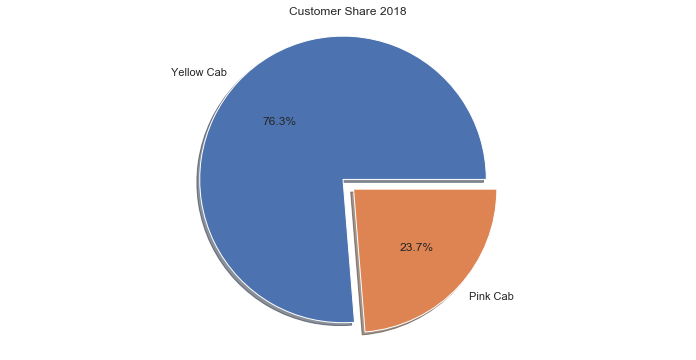

In [134]:
labels2018 = 'Yellow Cab','Pink Cab' 
pct2018 = [dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Yellow Cab')]['Customer_ID'].count(),dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Pink Cab')]['Customer_ID'].count()]
fig2018, ax2018 = plt.subplots()
ax2018.pie(pct2018 ,explode = [0.05]*2, labels=labels2018, autopct='%1.1f%%',shadow=True)
ax2018.axis('equal')

plt.title('Customer Share 2018')
plt.show()

In [135]:
customer_share_year = dataset_date.groupby(['Year', 'Company']).Customer_ID.nunique()
customer_share_year

Year  Company   
2016  Pink Cab      16661
      Yellow Cab    25937
2017  Pink Cab      18643
      Yellow Cab    27789
2018  Pink Cab      18400
      Yellow Cab    27470
Name: Customer_ID, dtype: int64

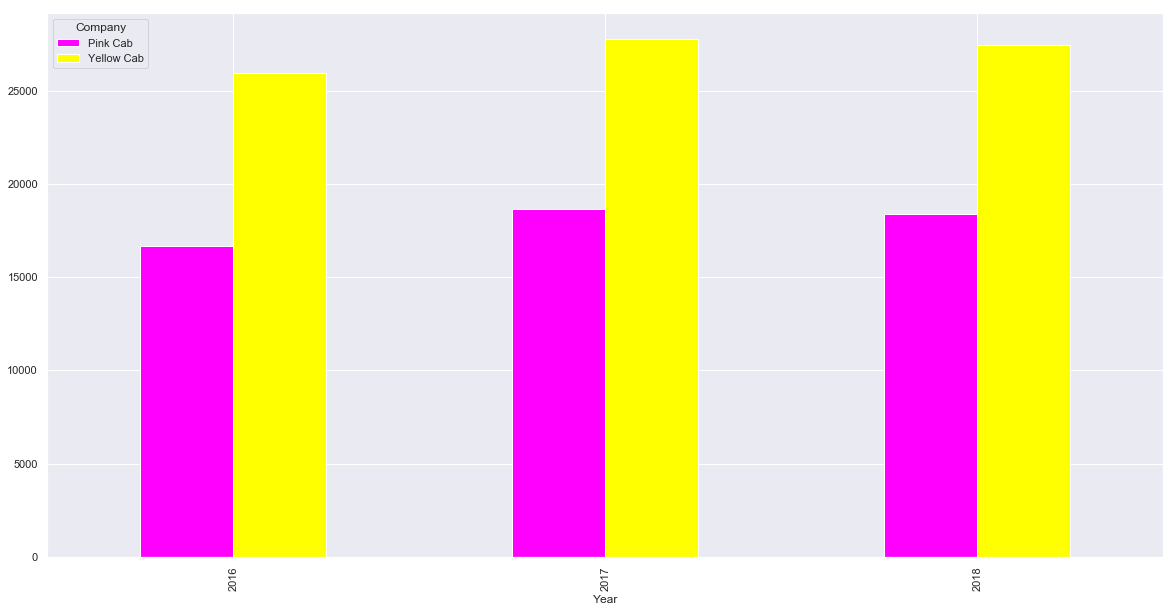

In [136]:
fig, ax = plt.subplots(figsize=(20,10))
customer_share_year.unstack().plot(ax=ax,kind = 'bar', color = ['magenta', 'yellow'])

Text(0.5,1,'Customers Share by Year')

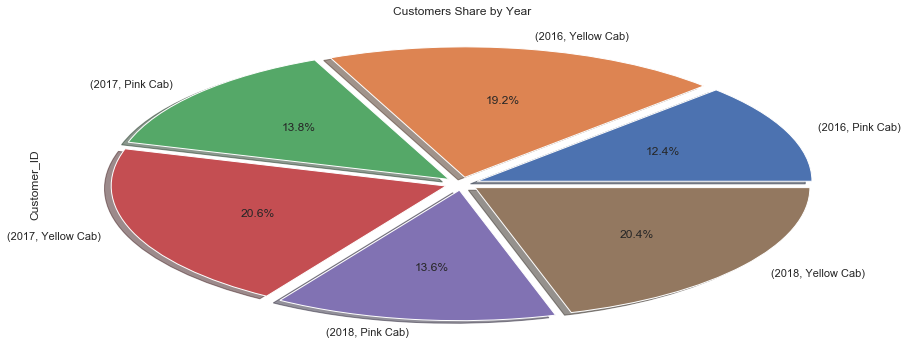

In [140]:
customer_share_year.plot.pie(subplots=True, figsize=(15, 6), explode=[0.05]*6, autopct='%1.1f%%', shadow=True)
plt.title('Customers Share by Year')

In [137]:
km_share_year = dataset_date.groupby(['Year', 'Company']).KM_Travelled.sum()
km_share_year

Year  Company   
2016  Pink Cab       563509.67
      Yellow Cab    1859978.21
2017  Pink Cab       685823.52
      Yellow Cab    2214879.02
2018  Pink Cab       661739.92
      Yellow Cab    2124560.24
Name: KM_Travelled, dtype: float64

Text(0.5,1,'Customers Share by KM Travelled')

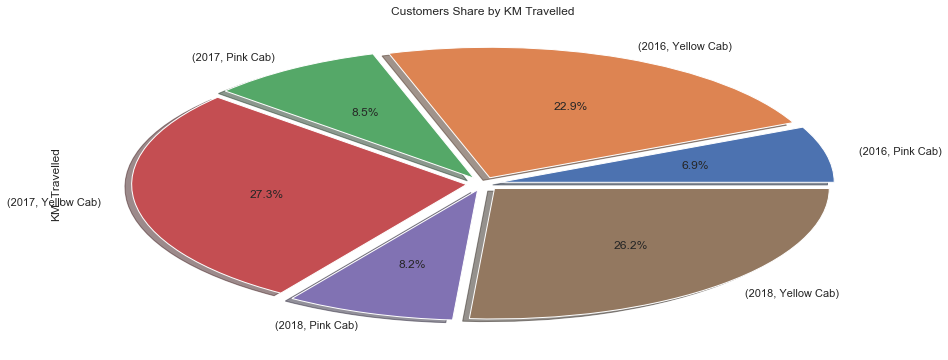

In [138]:
km_share_year.plot.pie(subplots=True, figsize=(15, 6), explode=[0.05]*6, autopct='%1.1f%%', shadow=True)
plt.title('Customers Share by KM Travelled')

# Payment mode used in different cities

In [201]:
payment_mode = dataset_date.groupby(['City', 'Payment_Mode']).Customer_ID .nunique()
payment_mode

City            Payment_Mode
ATLANTA GA      Card            2341
                Cash            1928
AUSTIN TX       Card            1894
                Cash            1425
BOSTON MA       Card            2994
                Cash            2952
CHICAGO IL      Card            3000
                Cash            2997
DALLAS TX       Card            2242
                Cash            1889
DENVER CO       Card            1617
                Cash            1166
LOS ANGELES CA  Card            2999
                Cash            2996
MIAMI FL        Card            2204
                Cash            1713
NASHVILLE TN    Card            1331
                Cash             984
NEW YORK NY     Card            3000
                Cash            3000
ORANGE COUNTY   Card            1658
                Cash            1252
PHOENIX AZ      Card            1044
                Cash             701
PITTSBURGH PA   Card             677
                Cash             492
SACRAMENT

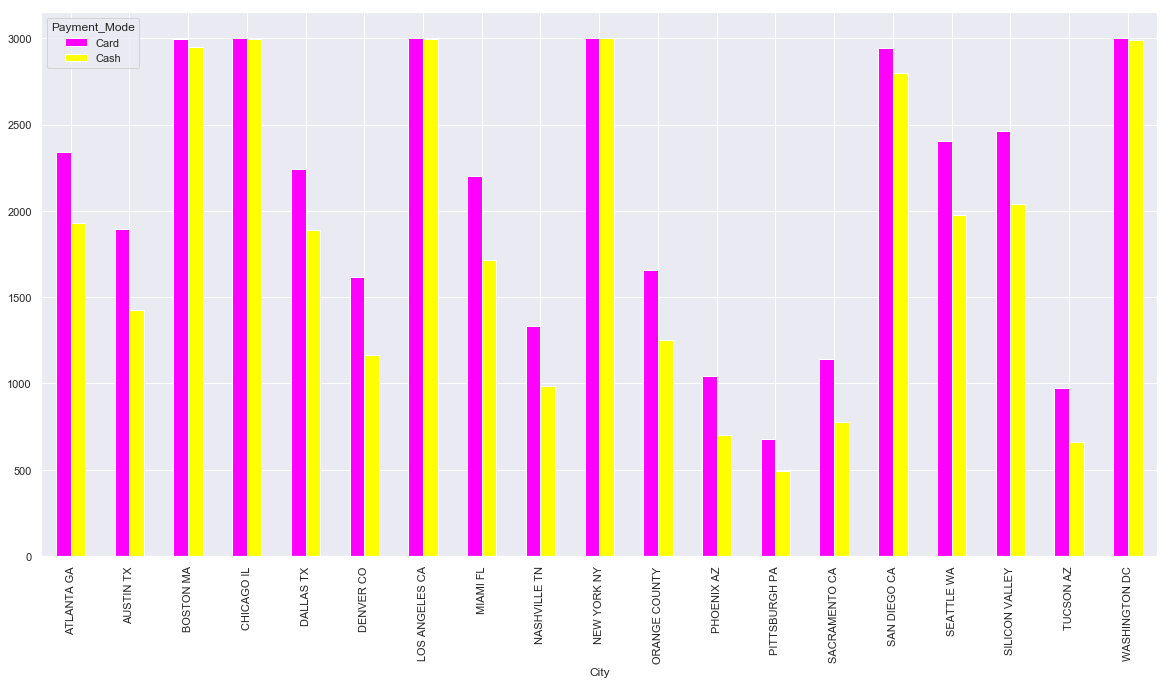

In [203]:
fig, ax = plt.subplots(figsize=(20,10))
payment_mode.unstack().plot(ax=ax,kind = 'bar', color = ['magenta', 'yellow'])

### payment mode according to  their profits for both cab

In [216]:
payment_mode_profit = dataset_date.groupby(['City', 'Payment_Mode','Company']).Profit.mean()
payment_mode_profit

City           Payment_Mode  Company   
ATLANTA GA     Card          Pink Cab       55.002736
                             Yellow Cab    126.724372
               Cash          Pink Cab       53.783068
                             Yellow Cab    131.870013
AUSTIN TX      Card          Pink Cab       80.668403
                                              ...    
TUCSON AZ      Cash          Yellow Cab     61.532533
WASHINGTON DC  Card          Pink Cab       52.606061
                             Yellow Cab     82.832940
               Cash          Pink Cab       52.294478
                             Yellow Cab     81.715660
Name: Profit, Length: 76, dtype: float64

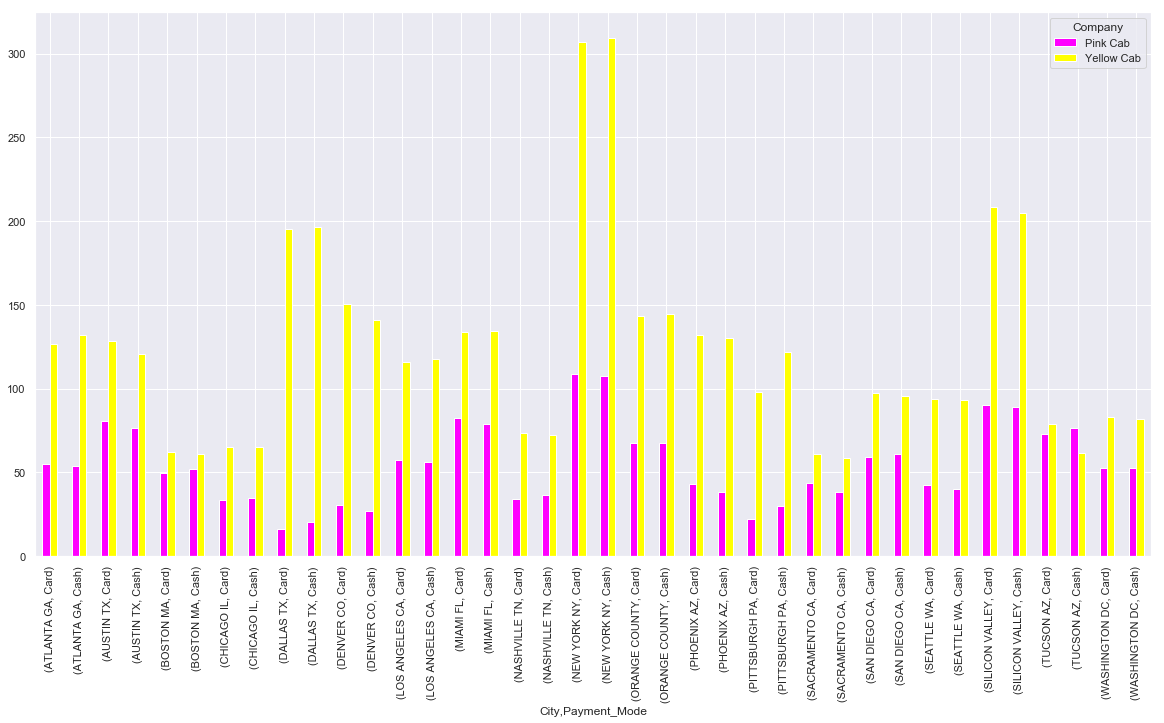

In [212]:
fig, ax = plt.subplots(figsize=(20,10))
payment_mode_profit.unstack().plot(ax=ax,kind = 'bar', color = ['magenta', 'yellow'])

# Age and Customer Share

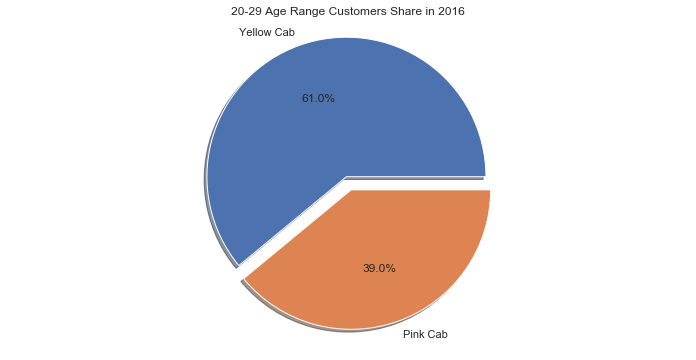

In [141]:
labelsyp_20_2016 = 'Yellow Cab','Pink Cab' 
pctyp_20_2016 = [dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Yellow Cab') &(dataset_date.Age_range == '20-29') ]['Customer_ID'].nunique(), dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Pink Cab') & (dataset_date.Age_range == '20-29')]['Customer_ID'].nunique() ]
figyp_20_2016, axyp_20_2016 = plt.subplots()
axyp_20_2016.pie(pctyp_20_2016 ,explode = [0.05]*2, labels=labelsyp_20_2016, autopct='%1.1f%%',shadow=True)
axyp_20_2016.axis('equal')

plt.title('20-29 Age Range Customers Share in 2016')
plt.show()

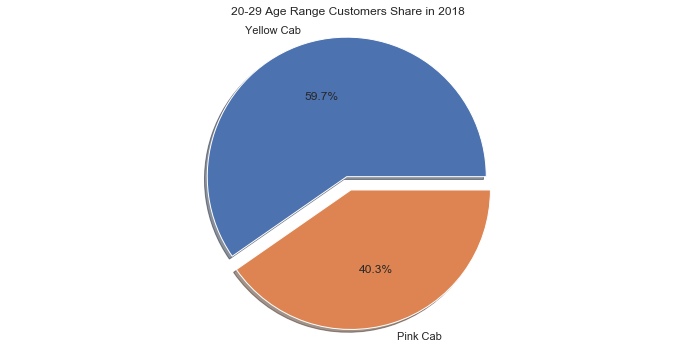

In [142]:
labelsyp_20_2018 = 'Yellow Cab','Pink Cab' 
pctyp_20_2018 = [dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Yellow Cab') &(dataset_date.Age_range == '20-29') ]['Customer_ID'].nunique(), dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Pink Cab') & (dataset_date.Age_range == '20-29')]['Customer_ID'].nunique() ]
figyp_20_2018, axyp_20_2018 = plt.subplots()
axyp_20_2018.pie(pctyp_20_2018 ,explode = [0.05]*2, labels=labelsyp_20_2018, autopct='%1.1f%%',shadow=True)
axyp_20_2018.axis('equal')

plt.title('20-29 Age Range Customers Share in 2018')
plt.show()

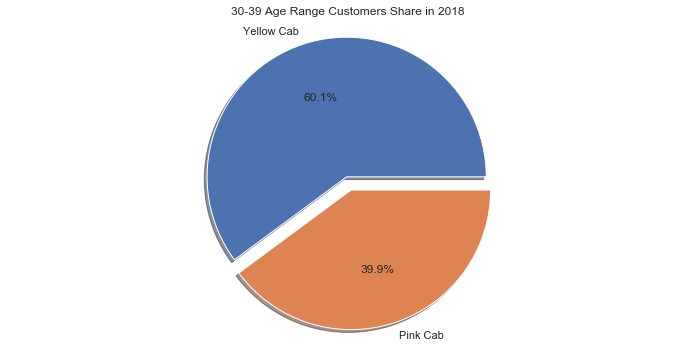

In [166]:
labelsyp_20_2018 = 'Yellow Cab','Pink Cab' 
pctyp_20_2018 = [dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Yellow Cab') &(dataset_date.Age_range == '30-39') ]['Customer_ID'].nunique(), dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Pink Cab') & (dataset_date.Age_range == '30-39')]['Customer_ID'].nunique() ]
figyp_20_2018, axyp_20_2018 = plt.subplots()
axyp_20_2018.pie(pctyp_20_2018 ,explode = [0.05]*2, labels=labelsyp_20_2018, autopct='%1.1f%%',shadow=True)
axyp_20_2018.axis('equal')

plt.title('30-39 Age Range Customers Share in 2018')
plt.show()

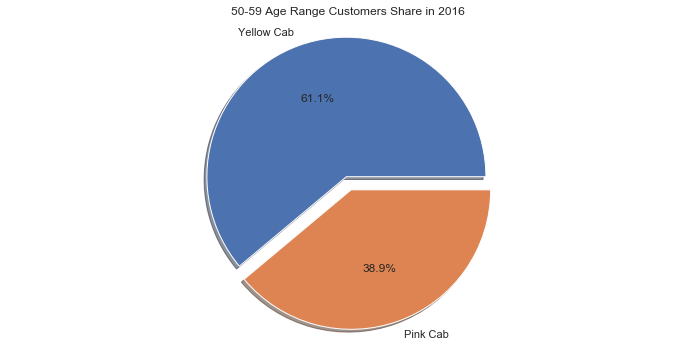

In [143]:
labelsyp_50_2016 = 'Yellow Cab','Pink Cab' 
pctyp_50_2016 = [dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Yellow Cab') &(dataset_date.Age_range == '50-59') ]['Customer_ID'].nunique(), dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Pink Cab') & (dataset_date.Age_range == '50-59')]['Customer_ID'].nunique() ]
figyp_50_2016, axyp_50_2016 = plt.subplots()
axyp_50_2016.pie(pctyp_50_2016 ,explode = [0.05]*2, labels=labelsyp_50_2016, autopct='%1.1f%%',shadow=True)
axyp_50_2016.axis('equal')

plt.title('50-59 Age Range Customers Share in 2016')
plt.show()

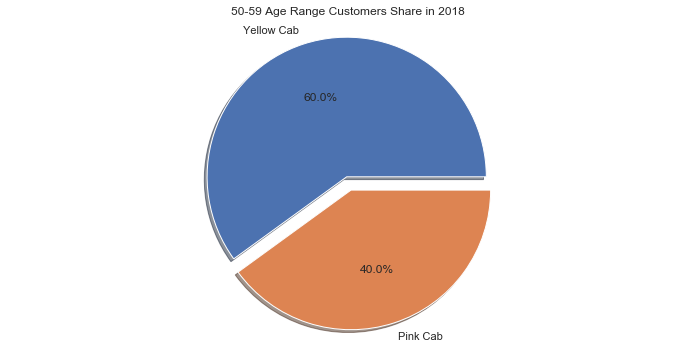

In [144]:
labelsyp_50_2018 = 'Yellow Cab','Pink Cab' 
pctyp_50_2018 = [dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Yellow Cab') &(dataset_date.Age_range == '50-59') ]['Customer_ID'].nunique(), dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Pink Cab') & (dataset_date.Age_range == '50-59')]['Customer_ID'].nunique() ]
figyp_50_2018, axyp_50_2018 = plt.subplots()
axyp_50_2018.pie(pctyp_50_2018 ,explode = [0.05]*2, labels=labelsyp_50_2018, autopct='%1.1f%%',shadow=True)
axyp_50_2018.axis('equal')

plt.title('50-59 Age Range Customers Share in 2018')
plt.show()

# Most Frequent Customers

In [145]:
dataset_date[dataset_date.Company=='Yellow Cab'].groupby('Customer_ID').Transaction_ID.count().sort_values(ascending=False).head(20)

Customer_ID
1360    47
1803    47
494     47
636     46
126     45
903     45
2766    45
1070    44
992     44
2539    44
2577    44
1673    44
1628    43
205     43
2895    43
1315    42
2658    42
1861    42
2057    42
1067    42
Name: Transaction_ID, dtype: int64

In [146]:
dataset_date[dataset_date.Company=='Pink Cab'].groupby('Customer_ID').Transaction_ID.count().sort_values(ascending=False).head(20)

Customer_ID
8120    18
6159    17
7927    17
8595    17
8915    16
8474    16
7340    16
8119    15
8721    15
7988    15
6416    15
7764    15
7938    15
8876    15
6543    14
6331    14
6644    14
7442    14
8327    14
7411    14
Name: Transaction_ID, dtype: int64

In [147]:
common_cust = dataset_date[dataset_date.Customer_ID==8474].groupby('Company').Transaction_ID.count()
common_cust

Company
Pink Cab      16
Yellow Cab    11
Name: Transaction_ID, dtype: int64

# Analysing Profits

In [229]:
dataset_correlation = dataset_date[['KM_Travelled','Price_Charged','Cost_of_Trip','Profit','Age', 'Income','Percentage_Users','Month','Year']]
dataset_correlation.corr()

KM_Travelled  Price_Charged  Cost_of_Trip    Profit  \
KM_Travelled          1.000000       0.835753      0.981848  0.462768   
Price_Charged         0.835753       1.000000      0.859812  0.864154   
Cost_of_Trip          0.981848       0.859812      1.000000  0.486056   
Profit                0.462768       0.864154      0.486056  1.000000   
Age                  -0.000369      -0.003084     -0.000189 -0.005093   
Income               -0.000544       0.003228     -0.000633  0.006148   
Percentage_Users      0.002305      -0.150070      0.018128 -0.274715   
Month                -0.001903      -0.061116     -0.008370 -0.096352   
Year                 -0.001072      -0.036409     -0.001773 -0.060567   

                       Age    Income  Percentage_Users     Month      Year  
KM_Travelled     -0.000369 -0.000544          0.002305 -0.001903 -0.001072  
Price_Charged    -0.003084  0.003228         -0.150070 -0.061116 -0.036409  
Cost_of_Trip     -0.000189 -0.000633          0.018128 -0.008370 -0.001773  
Profit           -0.005093  0.006148         -0.274715 -0.096352 -0.060567  
Age               1.000000  0.003907         -0.001778 -0.002226 -0.000579  
Income            0.003907  1.000000         -0.009332  0.000322 -0.001617  
Percentage_Users -0.001778 -0.009332          1.000000 -0.059641 -0.003306  
Month            -0.002226  0.000322         -0.059641  1.000000 -0.030490  
Year             -0.000579 -0.001617         -0.003306 -0.030490  1.000000

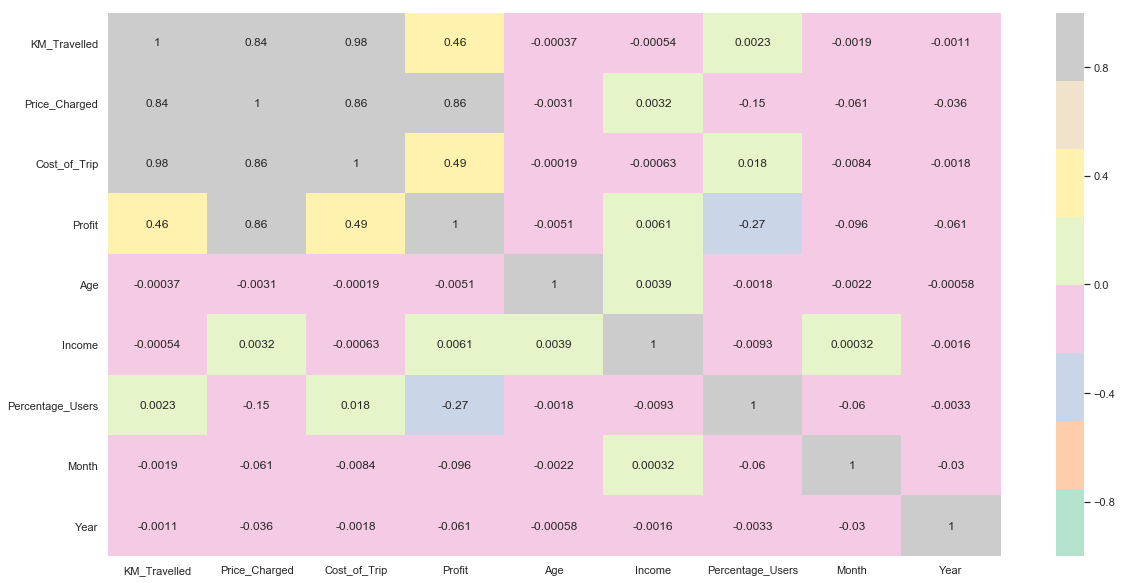

In [230]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset_correlation.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap="Pastel2")

In [150]:
city_profits = dataset_date[dataset_date.Month == 12].groupby('City').Profit.mean().sort_values(ascending=False)
city_profits

City
NEW YORK NY       256.663241
SILICON VALLEY    161.907324
DENVER CO         111.229893
DALLAS TX         107.653009
MIAMI FL           98.341176
ATLANTA GA         95.844236
AUSTIN TX          90.535487
TUCSON AZ          83.594826
LOS ANGELES CA     78.671170
NASHVILLE TN       78.562585
SEATTLE WA         75.043692
PHOENIX AZ         72.779471
ORANGE COUNTY      71.696141
SAN DIEGO CA       67.587428
BOSTON MA          61.158200
WASHINGTON DC      60.778328
PITTSBURGH PA      50.946547
CHICAGO IL         49.166594
SACRAMENTO CA      23.995713
Name: Profit, dtype: float64

In [151]:
# Profit per KM
dataset_date['ave_profit_km'] = (dataset_date['Price_Charged'] - dataset_date['Cost_of_Trip']) / dataset_date['KM_Travelled']

In [152]:
dataset_date

Transaction_ID  Customer_ID     Company           City  KM_Travelled  \
0             10000011        29290    Pink Cab     ATLANTA GA         30.45   
1             10000012        27703    Pink Cab     ATLANTA GA         28.62   
2             10000013        28712    Pink Cab     ATLANTA GA          9.04   
3             10000014        28020    Pink Cab     ATLANTA GA         33.17   
4             10000015        27182    Pink Cab     ATLANTA GA          8.73   
...                ...          ...         ...            ...           ...   
359387        10440101        52392  Yellow Cab  WASHINGTON DC          4.80   
359388        10440104        53286  Yellow Cab  WASHINGTON DC          8.40   
359389        10440105        52265  Yellow Cab  WASHINGTON DC         27.75   
359390        10440106        52175  Yellow Cab  WASHINGTON DC          8.80   
359391        10440107        52917  Yellow Cab  WASHINGTON DC         12.76   

        Price_Charged  Cost_of_Trip   Profit Payment_Mode Gender  Age  Income  \
0              370.95      313.6350  57.3150         Card   Male   28   10813   
1              358.52      334.8540  23.6660         Card   Male   27    9237   
2              125.20       97.6320  27.5680         Cash   Male   53   11242   
3              377.40      351.6020  25.7980         Cash   Male   23   23327   
4              114.62       97.7760  16.8440         Card   Male   33    8536   
...               ...           ...      ...          ...    ...  ...     ...   
359387          69.24       63.3600   5.8800         Cash   Male   24   15651   
359388         113.75      106.8480   6.9020         Cash   Male   32    6528   
359389         437.07      349.6500  87.4200         Cash   Male   56    7966   
359390         146.19      114.0480  32.1420         Card   Male   32    6423   
359391         191.58      177.6192  13.9608         Card   Male   20   11284   

        Population   Users  Percentage_Users  Month  Year  income_range  \
0           814885   24701          3.031225      1  2016    poor_class   
1           814885   24701          3.031225      1  2016    poor_class   
2           814885   24701          3.031225      1  2016    poor_class   
3           814885   24701          3.031225      1  2016  middle_class   
4           814885   24701          3.031225      1  2016    poor_class   
...            ...     ...               ...    ...   ...           ...   
359387      418859  127001         30.320705      1  2018  middle_class   
359388      418859  127001         30.320705      1  2018    poor_class   
359389      418859  127001         30.320705      1  2018    poor_class   
359390      418859  127001         30.320705      1  2018    poor_class   
359391      418859  127001         30.320705      1  2018    poor_class   

       Age_range  ave_profit_km  
0          20-29       1.882266  
1          20-29       0.826904  
2          50-59       3.049558  
3          20-29       0.777751  
4          30-39       1.929439  
...          ...            ...  
359387     20-29       1.225000  
359388     30-39       0.821667  
359389     50-59       3.150270  
359390     30-39       3.652500  
359391     20-29       1.094107  

[359392 rows x 20 columns]

In [153]:
dataset_date[dataset_date['ave_profit_km'] <= 0]

Transaction_ID  Customer_ID     Company           City  KM_Travelled  \
150           10009063        29525    Pink Cab     ATLANTA GA          6.78   
152           10009065        28136    Pink Cab     ATLANTA GA          4.48   
153           10009066        28685    Pink Cab     ATLANTA GA         28.75   
154           10009067        27280    Pink Cab     ATLANTA GA         25.96   
155           10009068        29924    Pink Cab     ATLANTA GA          7.49   
...                ...          ...         ...            ...           ...   
359348        10440058        52288  Yellow Cab  WASHINGTON DC         32.70   
359364        10440076        53475  Yellow Cab  WASHINGTON DC          8.19   
359367        10440080        53147  Yellow Cab  WASHINGTON DC          5.55   
359374        10440087        52010  Yellow Cab  WASHINGTON DC         47.20   
359382        10440096        52851  Yellow Cab  WASHINGTON DC         34.24   

        Price_Charged  Cost_of_Trip   Profit Payment_Mode  Gender  Age  \
150             65.70       77.2920 -11.5920         Card  Female   20   
152             47.93       48.8320  -0.9020         Cash    Male   35   
153            316.44      319.1250  -2.6850         Cash  Female   28   
154            243.70      267.3880 -23.6880         Cash    Male   62   
155             68.80       79.3940 -10.5940         Card    Male   42   
...               ...           ...      ...          ...     ...  ...   
359348         442.83      443.4120  -0.5820         Cash    Male   64   
359364         113.32      114.9876  -1.6676         Card  Female   36   
359367          78.43       78.5880  -0.1580         Card    Male   22   
359374         653.09      668.3520 -15.2620         Card    Male   19   
359382         458.64      472.5120 -13.8720         Card    Male   47   

        Income  Population   Users  Percentage_Users  Month  Year  \
150       7199      814885   24701          3.031225      2  2016   
152      21085      814885   24701          3.031225      2  2016   
153       2931      814885   24701          3.031225      2  2016   
154       2373      814885   24701          3.031225      2  2016   
155      10526      814885   24701          3.031225      2  2016   
...        ...         ...     ...               ...    ...   ...   
359348   14903      418859  127001         30.320705      1  2018   
359364   18038      418859  127001         30.320705      1  2018   
359367   11254      418859  127001         30.320705      1  2018   
359374   23602      418859  127001         30.320705      1  2018   
359382   23601      418859  127001         30.320705      1  2018   

        income_range Age_range  ave_profit_km  
150       poor_class     20-29      -1.709735  
152     middle_class     30-39      -0.201339  
153       poor_class     20-29      -0.093391  
154       poor_class       60+      -0.912481  
155       poor_class     40-49      -1.414419  
...              ...       ...            ...  
359348    poor_class       60+      -0.017798  
359364  middle_class     30-39      -0.203614  
359367    poor_class     20-29      -0.028468  
359374  middle_class     18-19      -0.323347  
359382  middle_class     40-49      -0.405140  

[24823 rows x 20 columns]

In [154]:
dataset_date[dataset_date['ave_profit_km'] <= 0].groupby(['Company']).count()

Transaction_ID  Customer_ID   City  KM_Travelled  Price_Charged  \
Company                                                                       
Pink Cab             11131        11131  11131         11131          11131   
Yellow Cab           13692        13692  13692         13692          13692   

            Cost_of_Trip  Profit  Payment_Mode  Gender    Age  Income  \
Company                                                                 
Pink Cab           11131   11131         11131   11131  11131   11131   
Yellow Cab         13692   13692         13692   13692  13692   13692   

            Population  Users  Percentage_Users  Month   Year  income_range  \
Company                                                                       
Pink Cab         11131  11131             11131  11131  11131         11130   
Yellow Cab       13692  13692             13692  13692  13692         13692   

            Age_range  ave_profit_km  
Company                               
Pink Cab        11131          11131  
Yellow Cab      13692          13692

Both companies have transactions with profits less than 0.

In [155]:
#dataset_date['Year'] = dataset_date['Month'].apply(lambda x: str(x)[0:4])
#dataset_date.head()

In [156]:
profit_km_year = dataset_date.groupby(['Year', 'Company'])['ave_profit_km'].mean()
profit_km_year.index.get_level_values('Year')
profit_km_year = profit_km_year.reset_index()
profit_km_year

Year     Company  ave_profit_km
0  2016    Pink Cab       3.026813
1  2016  Yellow Cab       7.489847
2  2017    Pink Cab       2.962883
3  2017  Yellow Cab       7.494612
4  2018    Pink Cab       2.350447
5  2018  Yellow Cab       6.364805

In [157]:
!pip install pyecharts

In [158]:
from pyecharts.charts import Bar,Grid,Line,Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode

In [159]:
fig_profit_km_year = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.HALLOWEEN))
    .add_xaxis(['2016', '2017', '2018'])
    .add_yaxis('Pink Cab', np.round(profit_km_year[profit_km_year['Company'] == 'Pink Cab']['ave_profit_km'], 2).tolist())
    .add_yaxis('Yellow Cab', np.round(profit_km_year[profit_km_year['Company'] == 'Yellow Cab']['ave_profit_km'], 2).tolist())
    .set_series_opts(
        label_opts=opts.LabelOpts(position='inside')
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Average Profit Per KM')
        , xaxis_opts=opts.AxisOpts(name='Year')
        , yaxis_opts=opts.AxisOpts(name='Average Profit Per KM')
    )
)
# fig_profit_km_year.load_javascript()
fig_profit_km_year.render_notebook()

In [160]:
pos_profit_p = dataset_date.groupby(['Year', 'Company'])['ave_profit_km'].apply(lambda x: (x>0).sum() / x.count())
pos_profit_p = pos_profit_p.reset_index()
pos_profit_p

Year     Company  ave_profit_km
0  2016    Pink Cab       0.870774
1  2016  Yellow Cab       0.952735
2  2017    Pink Cab       0.856106
3  2017  Yellow Cab       0.948110
4  2018    Pink Cab       0.879666
5  2018  Yellow Cab       0.950028

In [161]:
fig_pos_profit_p = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.HALLOWEEN))
    .add_xaxis(sorted(pos_profit_p['Year'].unique().tolist()))
    .add_yaxis('Pink Cab', np.round(pos_profit_p[pos_profit_p['Company'] == 'Pink Cab']['ave_profit_km'], 4).tolist())
    .add_yaxis('Yellow Cab', np.round(pos_profit_p[pos_profit_p['Company'] == 'Yellow Cab']['ave_profit_km'], 4).tolist())
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position='inside'
            , formatter=JsCode(
                "function(x){return Number(x.data * 100).toFixed(2) + '%';}"
            )
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Proportion of positive Profit')
        , xaxis_opts=opts.AxisOpts(name='Year')
        , yaxis_opts=opts.AxisOpts(name='Proportion')
    )
)
fig_pos_profit_p.render_notebook()


The percentage of profitable transactions for Yellow Cab is also larger than that of Pink Cab.

The profitability per km of Yellow Cab is much greater than that of Pink Cab

In [162]:
dataset_date

Transaction_ID  Customer_ID     Company           City  KM_Travelled  \
0             10000011        29290    Pink Cab     ATLANTA GA         30.45   
1             10000012        27703    Pink Cab     ATLANTA GA         28.62   
2             10000013        28712    Pink Cab     ATLANTA GA          9.04   
3             10000014        28020    Pink Cab     ATLANTA GA         33.17   
4             10000015        27182    Pink Cab     ATLANTA GA          8.73   
...                ...          ...         ...            ...           ...   
359387        10440101        52392  Yellow Cab  WASHINGTON DC          4.80   
359388        10440104        53286  Yellow Cab  WASHINGTON DC          8.40   
359389        10440105        52265  Yellow Cab  WASHINGTON DC         27.75   
359390        10440106        52175  Yellow Cab  WASHINGTON DC          8.80   
359391        10440107        52917  Yellow Cab  WASHINGTON DC         12.76   

        Price_Charged  Cost_of_Trip   Profit Payment_Mode Gender  Age  Income  \
0              370.95      313.6350  57.3150         Card   Male   28   10813   
1              358.52      334.8540  23.6660         Card   Male   27    9237   
2              125.20       97.6320  27.5680         Cash   Male   53   11242   
3              377.40      351.6020  25.7980         Cash   Male   23   23327   
4              114.62       97.7760  16.8440         Card   Male   33    8536   
...               ...           ...      ...          ...    ...  ...     ...   
359387          69.24       63.3600   5.8800         Cash   Male   24   15651   
359388         113.75      106.8480   6.9020         Cash   Male   32    6528   
359389         437.07      349.6500  87.4200         Cash   Male   56    7966   
359390         146.19      114.0480  32.1420         Card   Male   32    6423   
359391         191.58      177.6192  13.9608         Card   Male   20   11284   

        Population   Users  Percentage_Users  Month  Year  income_range  \
0           814885   24701          3.031225      1  2016    poor_class   
1           814885   24701          3.031225      1  2016    poor_class   
2           814885   24701          3.031225      1  2016    poor_class   
3           814885   24701          3.031225      1  2016  middle_class   
4           814885   24701          3.031225      1  2016    poor_class   
...            ...     ...               ...    ...   ...           ...   
359387      418859  127001         30.320705      1  2018  middle_class   
359388      418859  127001         30.320705      1  2018    poor_class   
359389      418859  127001         30.320705      1  2018    poor_class   
359390      418859  127001         30.320705      1  2018    poor_class   
359391      418859  127001         30.320705      1  2018    poor_class   

       Age_range  ave_profit_km  
0          20-29       1.882266  
1          20-29       0.826904  
2          50-59       3.049558  
3          20-29       0.777751  
4          30-39       1.929439  
...          ...            ...  
359387     20-29       1.225000  
359388     30-39       0.821667  
359389     50-59       3.150270  
359390     30-39       3.652500  
359391     20-29       1.094107  

[359392 rows x 20 columns]

In [163]:
class_pink_ave_profit = dataset_date[dataset_date['Company'] == 'Pink Cab'].groupby(['income_range'])['Profit'].mean().reset_index()
class_yellow_ave_profit = dataset_date[dataset_date['Company'] == 'Yellow Cab'].groupby(['income_range'])['Profit'].mean().reset_index()

class_pink_ave_profit['income_range'] = pd.Categorical(class_pink_ave_profit['income_range'], ordered=True)
class_pink_ave_profit.sort_values(['income_range'], inplace=True)
class_pink_ave_profit.reset_index(drop=True)

class_yellow_ave_profit['income_range'] = pd.Categorical(class_yellow_ave_profit['income_range'], ordered=True)
class_yellow_ave_profit.sort_values(['income_range'], inplace=True)
class_yellow_ave_profit.reset_index(drop=True)

income_range      Profit
0    poor_class  158.280773
1  middle_class  163.055722
2    rich_class  159.227305

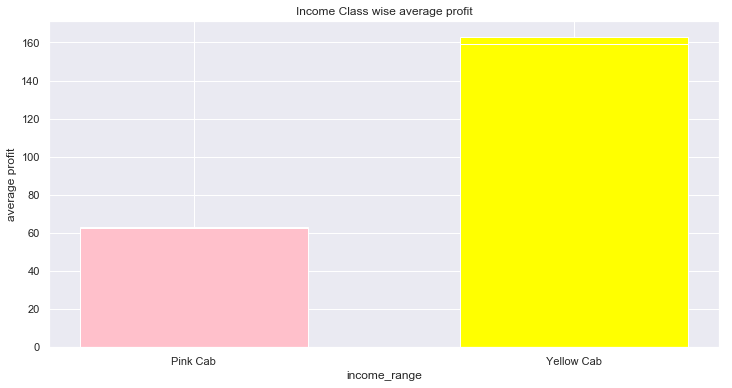

In [164]:
# Define width of stacked chart

w = 0.6

# Plot stacked bar chart
plt.bar('Pink Cab',class_pink_ave_profit['Profit'].tolist(), w, color='pink')
plt.bar('Yellow Cab',class_yellow_ave_profit['Profit'].tolist(), w, color='yellow')
# Plot stacked bar chart

# To add labels on x-axis

plt.xlabel('income_range')

# To add labels on y-axis

plt.ylabel('average profit')
plt.title('Income Class wise average profit')
# Display

plt.show()


In [165]:
fig_class_ave_profit = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.HALLOWEEN))
    .add_xaxis(labels)
    .add_yaxis('Pink Cab', class_pink_ave_profit['Profit'].tolist())
    .add_yaxis('Yellow Cab', class_yellow_ave_profit['Profit'].tolist())
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position='inside'
            , formatter=JsCode(
                "function(x){return Number(x.data).toFixed(2);}"
            )
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Income Class wise average profit')
        , xaxis_opts=opts.AxisOpts(name='income_range')
        , yaxis_opts=opts.AxisOpts(name='average profit')
    )
)
fig_class_ave_profit.render_notebook()

The average profit contributed by people with different incomes taking cabs is about the same. But the average profit of Yellow Cab is much larger than that of Pink Cab.

# NY Profits by Company

In [167]:
ny_profit_yc = dataset_date[(dataset_date.Company=='Yellow Cab')&(dataset_date.City=='NEW YORK NY')].groupby(['Year','Month']).Profit.mean()
ny_profit_yc.head()

Year  Month
2016  1        400.349650
      2        440.934082
      3        349.676596
      4        338.014526
      5        404.995508
Name: Profit, dtype: float64

In [168]:
yc_profit = pd.DataFrame({'Yellow_Profits':ny_profit_yc.values,'Yellow_Transactions':dataset_date[dataset_date.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values, 'Yellow_Transactions':dataset_date[dataset_date.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values, 'Yellow_KM':dataset_date[dataset_date.Company=='Yellow Cab'].groupby(['Year','Month']).KM_Travelled.sum().values})
yc_profit.head()

Yellow_Profits  Yellow_Transactions  Yellow_KM
0      400.349650                 3719   84603.65
1      440.934082                 4674  105302.33
2      349.676596                 5146  117491.88
3      338.014526                 5360  121806.35
4      404.995508                 5967  133638.34

In [169]:
yc_profit.corr()

Yellow_Profits  Yellow_Transactions  Yellow_KM
Yellow_Profits             1.000000            -0.761895  -0.764355
Yellow_Transactions       -0.761895             1.000000   0.999842
Yellow_KM                 -0.764355             0.999842   1.000000

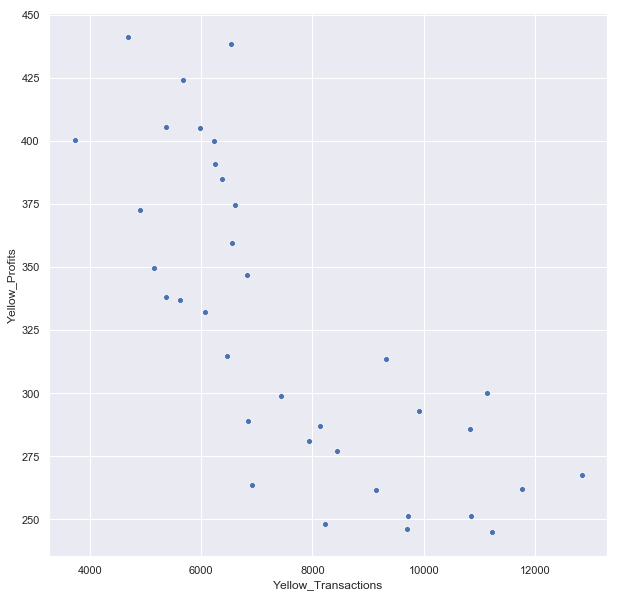

In [170]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = yc_profit.Yellow_Transactions,y = yc_profit.Yellow_Profits)

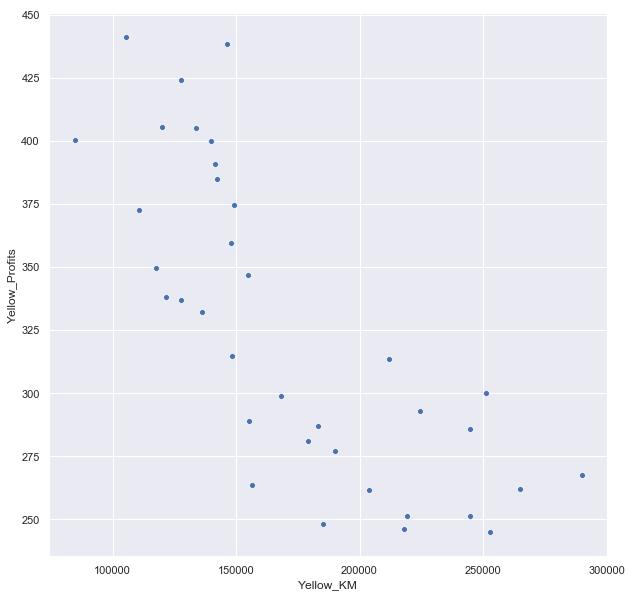

In [171]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = yc_profit.Yellow_KM,y = yc_profit.Yellow_Profits)

In [172]:
ny_profit_pc = dataset_date[(dataset_date.Company=='Pink Cab')&(dataset_date.City=='NEW YORK NY')].groupby(['Year','Month']).Profit.mean()
ny_profit_pc.head()

Year  Month
2016  1         92.129950
      2        128.794693
      3        114.400288
      4         85.057904
      5         48.949528
Name: Profit, dtype: float64

In [173]:
pc_profit = pd.DataFrame({'Pink_Profits':ny_profit_pc.values,'Pink_Transactions':dataset_date[dataset_date.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values,'Pink_KM':dataset_date[dataset_date.Company=='Pink Cab'].groupby(['Year','Month']).KM_Travelled.sum().values})
pc_profit.head()

Pink_Profits  Pink_Transactions   Pink_KM
0     92.129950                927  21018.83
1    128.794693               1050  23419.84
2    114.400288               1231  27893.78
3     85.057904               1240  27357.38
4     48.949528               1567  35137.83

In [174]:
pc_profit.corr()

Pink_Profits  Pink_Transactions   Pink_KM
Pink_Profits           1.000000           0.499074  0.497704
Pink_Transactions      0.499074           1.000000  0.999727
Pink_KM                0.497704           0.999727  1.000000

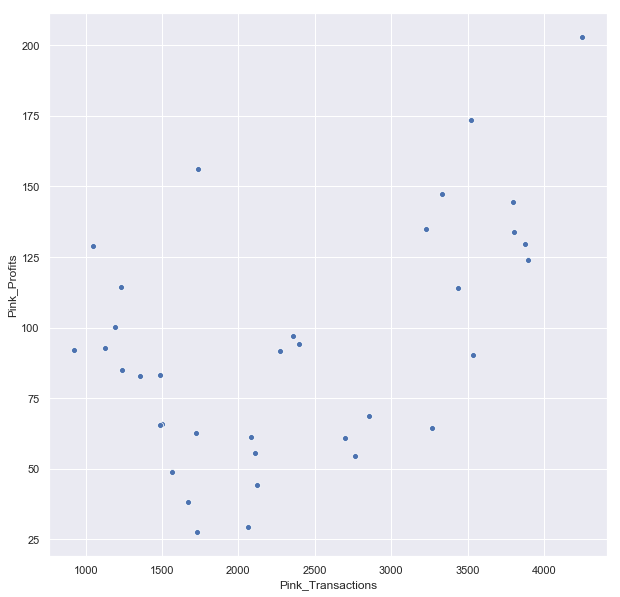

In [175]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_profit.Pink_Transactions,y = pc_profit.Pink_Profits)

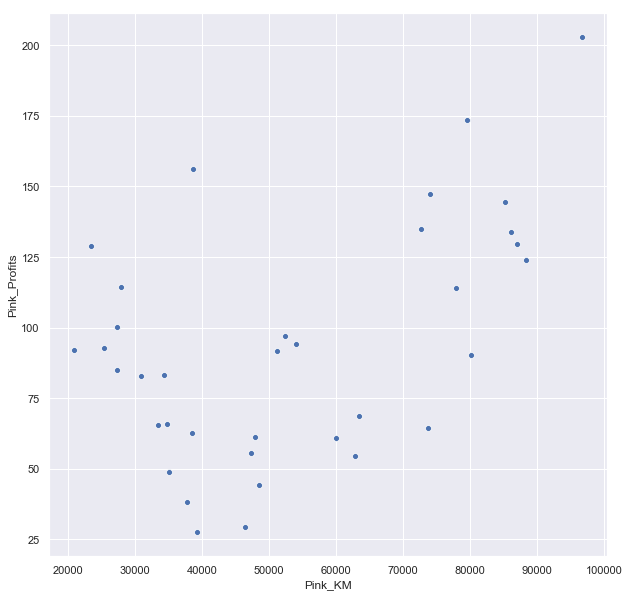

In [176]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_profit.Pink_KM,y = pc_profit.Pink_Profits)

In [177]:
dataset_date.groupby(['Gender','Company']).Profit.mean()

Gender  Company   
Female  Pink Cab       62.180701
        Yellow Cab    156.305325
Male    Pink Cab       63.026310
        Yellow Cab    163.150948
Name: Profit, dtype: float64

# Hypothesis

## one

H0: KMs Travelled and Profit gained are not related. (p = 0)

H1: KMs Travelled and Profit gained are related. (p != 0)

In [178]:
data1 = dataset_date['KM_Travelled']

In [179]:
data2 = dataset_date['Profit']
data2

0         57.3150
1         23.6660
2         27.5680
3         25.7980
4         16.8440
           ...   
359387     5.8800
359388     6.9020
359389    87.4200
359390    32.1420
359391    13.9608
Name: Profit, Length: 359392, dtype: float64

In [204]:
from scipy.stats import pearsonr

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('KMs Travelled and Profit gained are not related.')
else:
    print('KMs Travelled and Profit gained are related.')

stat=0.463, p=0.000
KMs Travelled and Profit gained are not related.


A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

## Two

H0: There is no difference in KM Travelled by Females compared to Males for Yellow Cab.

H1: There is a difference in KM Travelled by Females compared to Males for Yellow Cab.

In [205]:
dataf_KM = dataset_date[(dataset_date.Gender=='Female')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
datam_KM = dataset_date[(dataset_date.Gender=='Male')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
print(dataf_KM.shape[0],datam_KM.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(dataf_KM.values,datam_KM.values,equal_var=True)
if(p_value < 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternate hypothesis')
    
print('P value is ', p_value)

116000 158681
Accept alternate hypothesis
P value is  0.5146654429411317


## Three

H0: Females bring in less profits than Males for Yellow Cab.

H1: Females bring in more profits than Males for Yellow Cab.

In [206]:
datafy_Profit = dataset_date[(dataset_date.Gender=='Female')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
datamy_Profit = dataset_date[(dataset_date.Gender=='Male')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(datafy_Profit.shape[0],datamy_Profit.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(datafy_Profit.values,datamy_Profit.values,equal_var=True)
if(p_value < 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

116000 158681
Accept null hypothesis
P value is  6.060473042494144e-25


A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. You should note that you cannot accept the null hypothesis, we can only reject the null or fail to reject it.

H0: Females bring in less profits than Males for Pink Cab.

H1: Females bring in more profits than Males for Pink Cab.

In [223]:
datafp_Profit = dataset_date[(dataset_date.Gender=='Female')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
datamp_Profit = dataset_date[(dataset_date.Gender=='Male')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(datafp_Profit.shape[0],datamp_Profit.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(datafp_Profit.values,datamp_Profit.values,equal_var=True)
if(p_value < 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

37480 47231
Accept alternative hypothesis
P value is  0.11515305900425798


## Four

H0: The mean Profit for the different Age groups for Yellow Cab are equal.

H1: One or more of the mean Profits for the different Age groups for Yellow Cab are unequal.

In [184]:
age18_y = dataset_date[(dataset_date.Age_range == '18-19')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age20_y = dataset_date[(dataset_date.Age_range == '20-29')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age30_y = dataset_date[(dataset_date.Age_range == '30-39')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age40_y = dataset_date[(dataset_date.Age_range == '40-49')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age50_y = dataset_date[(dataset_date.Age_range == '50-59')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age60_y = dataset_date[(dataset_date.Age_range == '60+')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

In [222]:
from scipy.stats import f_oneway

stat, p = f_oneway(age18_y.values, age20_y.values, age30_y.values, age40_y.values, age50_y.values, age60_y.values)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The mean Profit for the different Age groups for Yellow Cab are equal.')
else:
    print('One or more of the mean Profits for the different Age groups for Yellow Cab are unequal.')

stat=9.610, p=0.000
One or more of the mean Profits for the different Age groups for Yellow Cab are unequal.


H0: The mean Profit for the different Age groups for Pink Cab are equal.

H1: One or more of the mean Profits for the different Age groups for Pink Cab are unequal.

In [186]:
age18_p = dataset_date[(dataset_date.Age_range == '18-19')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age20_p = dataset_date[(dataset_date.Age_range == '20-29')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age30_p = dataset_date[(dataset_date.Age_range == '30-39')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age40_p = dataset_date[(dataset_date.Age_range == '40-49')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age50_p = dataset_date[(dataset_date.Age_range == '50-59')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age60_p = dataset_date[(dataset_date.Age_range == '60+')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

In [221]:
from scipy.stats import f_oneway

stat, p = f_oneway(age18_p.values, age20_p.values, age30_p.values, age40_p.values, age50_p.values, age60_p.values)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('There is no difference in Profit due to Age')
else:
    print('There is a difference in Profit due to Age')

stat=0.962, p=0.439
There is no difference in Profit due to Age


## Five

H0: There is no difference in Profits for Card and Cash Payers for Yellow Cab.

H1: There is a difference in Profits for Card and Cash Payers for Yellow Cab.

In [208]:
ypay_cash = dataset_date[(dataset_date.Payment_Mode=='Cash')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
ypay_card = dataset_date[(dataset_date.Payment_Mode=='Card')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(ypay_cash.shape[0],ypay_card.shape[0])

_, p_value = stats.ttest_ind(ypay_cash.values,ypay_card.values,equal_var=True)
if(p_value < 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

109896 164785
Accept alternative hypothesis
P value is  0.29330606382985325


H0: There is no difference in Profits for Card and Cash Payers for Pink Cab.

H1: There is a difference in Profits for Card and Cash Payers for Pink Cab.

In [209]:
ppay_cash = dataset_date[(dataset_date.Payment_Mode=='Cash')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
ppay_card = dataset_date[(dataset_date.Payment_Mode=='Card')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(ppay_cash.shape[0],ppay_card.shape[0])

_, p_value = stats.ttest_ind(ppay_cash.values,ppay_card.values,equal_var=True)
if(p_value < 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

33992 50719
Accept alternative hypothesis
P value is  0.7900465828793288
